## Telecom Churn

### Problem Statement
##### For many telecom operators, it costs 5-10 times more to acquire a new customer than to retain an existing one,  and thus customer retention has now become even more important than customer acquisition. Hence, retaining high profitable customers has become number one business goal.  To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### Proposed Solution
##### We need to identify the probable customers who are looking at moving to another provider, that is result in a churn.  Given data contains 4 months data, where last month (4th months, the columns are indicated as for month 9 in calendar) data will help us the churned customers.  First two months to 3rd month the difference in behaviour indicates the customers looking at moving out to another provider.  Using the given data, we first find out churn and no churn.  From the existing data set we find the model which will help us predict churn or no churn, in near future ( on the unseen data).

### As our requirement is to find most of the churn candidates, we will use sensitivity/recall metric in our model in addition to accuracy to pick the best model for our purpose.

### This Model's purpose is
#### 1) to predict whether a high-value customer will churn or not, in near future.
#### 2) to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

### Data Understanding and Cleaning

Import the required python libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [92]:
# Use this cell only when using Google drive with datasets.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Use this cell only when using Google drive with datasets.
telecom_df = pd.read_csv('/content/drive/My Drive/MLDatasets/telecom_churn_data.csv', 
                         encoding='ISO-8859-1')

Read the data into data frame

In [2]:
# Use this cell only when reading the dataset from local drive
telecom_df = pd.read_csv('telecom_churn_data.csv', 
                         encoding='ISO-8859-1')

In [3]:
telecom_df.shape

(99999, 226)

##### We have 99,999 rows with 226 columns in data frame

In [4]:
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
telecom_df['mobile_number'].nunique()

99999

##### We can see that all the values of mobile_number column are unique

In [6]:
telecom_df.info

<bound method DataFrame.info of        mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
1                 0.0        

##### We can see that we have some columns with missing values.

In [7]:
print(telecom_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


##### We can see that out of 226 columns, 179 are of float data type, 35 are of int data type and 12 are of object type.

#### Let us treat the missing values

In [8]:
# Check the ratio of nulls in the columns and order the columns by null values percentage.
print(round(100*(telecom_df.isnull().sum()/len(telecom_df.index))).sort_values())

mobile_number                0.0
last_day_rch_amt_9           0.0
last_day_rch_amt_8           0.0
last_day_rch_amt_7           0.0
last_day_rch_amt_6           0.0
                            ... 
arpu_3g_6                   75.0
date_of_last_rech_data_6    75.0
av_rech_amt_data_6          75.0
count_rech_3g_6             75.0
max_rech_data_6             75.0
Length: 226, dtype: float64


#### Let us check for the missing values for features 'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9', 'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9'

In [9]:
temp_df = telecom_df[['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9', 'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9']]
print(round(100*(temp_df.isnull().sum()/len(temp_df.index))).sort_values())

arpu_3g_7    74.0
arpu_3g_8    74.0
arpu_3g_9    74.0
arpu_2g_7    74.0
arpu_2g_8    74.0
arpu_2g_9    74.0
arpu_3g_6    75.0
arpu_2g_6    75.0
dtype: float64


#### Let us impute the missing values for features 'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9', 'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9' with median values

In [10]:
telecom_df[['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9', 'arpu_2g_6','arpu_2g_7','arpu_2g_8',
            'arpu_2g_9']] = telecom_df[['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9', 'arpu_2g_6','arpu_2g_7',
                                        'arpu_2g_8','arpu_2g_9']].apply(lambda x: x.fillna(x.median()),axis=0)

In [11]:
# Again, check the ratio of nulls in the columns and order the columns by null values percentage.
print(round(100*(telecom_df.isnull().sum()/len(telecom_df.index))).sort_values())

mobile_number                0.0
vol_2g_mb_9                  0.0
vol_2g_mb_8                  0.0
vol_2g_mb_7                  0.0
vol_2g_mb_6                  0.0
                            ... 
total_rech_data_6           75.0
night_pck_user_6            75.0
date_of_last_rech_data_6    75.0
count_rech_3g_6             75.0
av_rech_amt_data_6          75.0
Length: 226, dtype: float64


#### Let us check for the missing values for features 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'

In [12]:
temp_df = telecom_df[['date_of_last_rech_data_6','date_of_last_rech_data_7',
                      'date_of_last_rech_data_8','date_of_last_rech_data_9']]
print(round(100*(temp_df.isnull().sum()/len(temp_df.index))).sort_values())

date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
date_of_last_rech_data_6    75.0
dtype: float64


#### As date fields does not offer much information for modelling, let us drop them

In [13]:
columns_to_drop = ['date_of_last_rech_data_6','date_of_last_rech_data_7',
                      'date_of_last_rech_data_8','date_of_last_rech_data_9']
telecom_df = telecom_df.drop(columns_to_drop, axis=1)
print(round(100*(telecom_df.isnull().sum()/len(telecom_df.index))).sort_values())

mobile_number          0.0
vol_2g_mb_9            0.0
vol_2g_mb_8            0.0
vol_2g_mb_7            0.0
vol_2g_mb_6            0.0
                      ... 
fb_user_6             75.0
count_rech_3g_6       75.0
night_pck_user_6      75.0
av_rech_amt_data_6    75.0
count_rech_2g_6       75.0
Length: 222, dtype: float64


#### Let us check for the missing values for features 'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9', 'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9'

In [14]:
temp_df = telecom_df[['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9', 
                      'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9']]
print(round(100*(temp_df.isnull().sum()/len(temp_df.index))).sort_values())

count_rech_3g_7    74.0
count_rech_3g_8    74.0
count_rech_3g_9    74.0
count_rech_2g_7    74.0
count_rech_2g_8    74.0
count_rech_2g_9    74.0
count_rech_3g_6    75.0
count_rech_2g_6    75.0
dtype: float64


#### As the features 'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9', 'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9' indicate the number of times customer has recharged in the month for 2g or 3g based on the column we are referring to.  If the value is null means the customer has not done recharge and hence does not change business meaning by imputing these features missing values to 0.  Hence let us impute these features to 0 for missing values.

In [15]:
telecom_df.fillna({'count_rech_3g_6':0, 'count_rech_3g_7':0, 'count_rech_3g_8':0, 'count_rech_3g_9':0, 
           'count_rech_2g_6':0, 'count_rech_2g_7':0, 'count_rech_2g_8':0, 'count_rech_2g_9':0,}, inplace=True)
print(round(100*(telecom_df.isnull().sum()/len(telecom_df.index))).sort_values())

mobile_number          0.0
count_rech_3g_9        0.0
count_rech_3g_8        0.0
count_rech_3g_7        0.0
count_rech_3g_6        0.0
                      ... 
total_rech_data_6     75.0
av_rech_amt_data_6    75.0
fb_user_6             75.0
night_pck_user_6      75.0
max_rech_data_6       75.0
Length: 222, dtype: float64


#### Let us check for the missing values for features 'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9'

In [16]:
temp_df = telecom_df[['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9', 
                      'fb_user_6','fb_user_7','fb_user_8','fb_user_9']]
print('Missing values % :')
print('------------------')
print(round(100*(temp_df.isnull().sum()/len(temp_df.index))).sort_values())
print('Number of unique values :')
print('-------------------------'), 
print(temp_df.nunique())
temp_df.describe()

Missing values % :
------------------
night_pck_user_7    74.0
night_pck_user_8    74.0
night_pck_user_9    74.0
fb_user_7           74.0
fb_user_8           74.0
fb_user_9           74.0
night_pck_user_6    75.0
fb_user_6           75.0
dtype: float64
Number of unique values :
-------------------------
night_pck_user_6    2
night_pck_user_7    2
night_pck_user_8    2
night_pck_user_9    2
fb_user_6           2
fb_user_7           2
fb_user_8           2
fb_user_9           2
dtype: int64


,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,0.025086,0.023034,0.020844,0.015971,0.914404,0.908764,0.890808,0.860968
std,0.156391,0.150014,0.142863,0.125366,0.279772,0.287950,0.311885,0.345987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### We can see from the above output features starting with 'night_pck_user_','fb_user_' indicates if the customer subscribed to night pack or not and facebook user or not respectively.  All these columns have two unique values 1 and 0 indicating if the customer is availing or using this service or not in the respective month.  For the missing values we can impute with 0 indicating the customer is not availing the service.

In [17]:
telecom_df.fillna({'night_pck_user_6':0, 'night_pck_user_7':0, 'night_pck_user_8':0, 'night_pck_user_9':0, 
           'fb_user_6':0, 'fb_user_7':0, 'fb_user_8':0, 'fb_user_9':0,}, inplace=True)
print(round(100*(telecom_df.isnull().sum()/len(telecom_df.index))).sort_values())

mobile_number          0.0
last_day_rch_amt_7     0.0
last_day_rch_amt_8     0.0
last_day_rch_amt_9     0.0
count_rech_2g_6        0.0
                      ... 
max_rech_data_8       74.0
av_rech_amt_data_7    74.0
max_rech_data_6       75.0
av_rech_amt_data_6    75.0
total_rech_data_6     75.0
Length: 222, dtype: float64


#### Let us check for the missing values for features 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8', 'av_rech_amt_data_9','max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9'

In [18]:
temp_df = telecom_df[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8', 'av_rech_amt_data_9',
                      'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9']]
print('Missing values % :')
print('------------------')
print(round(100*(temp_df.isnull().sum()/len(temp_df.index))).sort_values())
print('Number of unique values :')
print('-------------------------'), 
print(temp_df.nunique())
temp_df.describe()

Missing values % :
------------------
av_rech_amt_data_7    74.0
av_rech_amt_data_8    74.0
av_rech_amt_data_9    74.0
max_rech_data_7       74.0
max_rech_data_8       74.0
max_rech_data_9       74.0
av_rech_amt_data_6    75.0
max_rech_data_6       75.0
dtype: float64
Number of unique values :
-------------------------
av_rech_amt_data_6    887
av_rech_amt_data_7    961
av_rech_amt_data_8    973
av_rech_amt_data_9    945
max_rech_data_6        48
max_rech_data_7        48
max_rech_data_8        50
max_rech_data_9        50
dtype: int64


,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000
mean,192.600982,200.981292,197.526489,192.734315,126.393392,126.729459,125.717301,124.94144
std,192.646318,196.791224,191.301305,188.400286,108.477235,109.765267,109.437851,111.36376
min,1.000000,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,82.000000,92.000000,87.000000,69.000000,25.000000,25.000000,25.000000,25.00000
50%,154.000000,154.000000,154.000000,164.000000,145.000000,145.000000,145.000000,145.00000
75%,252.000000,252.000000,252.000000,252.000000,177.000000,177.000000,179.000000,179.00000
max,7546.000000,4365.000000,4076.000000,4061.000000,1555.000000,1555.000000,1555.000000,1555.00000


#### As the features 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8', 'av_rech_amt_data_9', 'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9' are continous variables, let us impute them with median.

In [19]:
telecom_df[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8', 'av_rech_amt_data_9', 'max_rech_data_6',
            'max_rech_data_7','max_rech_data_8','max_rech_data_9' ]] = telecom_df[['av_rech_amt_data_6',
            'av_rech_amt_data_7','av_rech_amt_data_8', 'av_rech_amt_data_9', 'max_rech_data_6',
            'max_rech_data_7','max_rech_data_8','max_rech_data_9']].apply(lambda x: x.fillna(x.median()),axis=0)
print(round(100*(telecom_df.isnull().sum()/len(telecom_df.index))).sort_values())

mobile_number         0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
                     ... 
loc_og_t2t_mou_9      8.0
total_rech_data_9    74.0
total_rech_data_8    74.0
total_rech_data_7    74.0
total_rech_data_6    75.0
Length: 222, dtype: float64


#### Let us check for the missing values for features 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9'

In [20]:
temp_df = telecom_df[['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']]
print('Missing values % :')
print('------------------')
print(round(100*(temp_df.isnull().sum()/len(temp_df.index))).sort_values())
print('Number of unique values :')
print('-------------------------'), 
print(temp_df.nunique())
temp_df.describe()

Missing values % :
------------------
total_rech_data_7    74.0
total_rech_data_8    74.0
total_rech_data_9    74.0
total_rech_data_6    75.0
dtype: float64
Number of unique values :
-------------------------
total_rech_data_6    37
total_rech_data_7    42
total_rech_data_8    46
total_rech_data_9    37
dtype: int64


,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170
std,2.789128,3.031593,3.074987,2.516339
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000
75%,3.000000,3.000000,3.000000,3.000000
max,61.000000,54.000000,60.000000,84.000000


#### 'total_rech_data_' column indicates total recharge done for data in that calendar month.  And hence If the column has missing value let us impute with 0.

In [21]:
telecom_df.fillna({'total_rech_data_6':0, 'total_rech_data_7':0, 'total_rech_data_8':0, 
                   'total_rech_data_9':0,}, inplace=True)
print(round(100*(telecom_df.isnull().sum()/len(telecom_df.index))).sort_values())

mobile_number        0.0
total_rech_data_9    0.0
max_rech_data_6      0.0
max_rech_data_7      0.0
max_rech_data_8      0.0
                    ... 
loc_og_t2t_mou_9     8.0
std_ic_t2m_mou_9     8.0
roam_og_mou_9        8.0
std_ic_t2t_mou_9     8.0
loc_og_t2f_mou_9     8.0
Length: 222, dtype: float64


#### All the features with mou are Minutes of Usage.  For mou features with missing values let us impute with 0

In [22]:
telecom_df.columns[0:50]

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6'],
      dtype='obje

In [23]:
telecom_df.fillna({'loc_og_t2o_mou':0, 'std_og_t2o_mou':0, 'std_og_t2o_mou':0, 'onnet_mou_6':0, 
                   'onnet_mou_7':0, 'onnet_mou_8':0, 'onnet_mou_9':0, 'offnet_mou_6':0, 
                   'offnet_mou_7':0, 'offnet_mou_8':0 , 'onnet_mou_9':0, 'roam_ic_mou_6':0,
                   'roam_ic_mou_7':0, 'roam_ic_mou_8':0, 'roam_ic_mou_9':0, 'roam_og_mou_6':0,
                   'roam_og_mou_7':0, 'roam_og_mou_8':0, 'roam_og_mou_9':0, 'loc_og_t2t_mou_6':0,
                   'loc_og_t2t_mou_7':0, 'loc_og_t2t_mou_8':0, 'loc_og_t2t_mou_9':0, 'loc_og_t2m_mou_6':0,
                   'loc_og_t2m_mou_7':0, 'loc_og_t2m_mou_8':0, 'loc_og_t2m_mou_9':0, 'loc_og_t2f_mou_6':0,
                   'loc_og_t2f_mou_7':0, 'loc_og_t2f_mou_8':0, 'loc_og_t2f_mou_9':0, 'loc_og_t2c_mou_6':0,
                   'loc_og_t2c_mou_7':0, 'loc_og_t2c_mou_8':0, 'loc_og_t2c_mou_9':0, 'loc_og_mou_6':0,
                   'loc_og_mou_7':0, 'loc_og_mou_8':0, 'loc_og_mou_9':0, 'std_og_t2t_mou_6':0,
                   'std_og_t2t_mou_7':0, 'std_og_t2t_mou_8':0, 'std_og_t2t_mou_9':0}, inplace=True)


In [24]:
telecom_df.columns[51:100]

Index(['std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'std_og_mou_9', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'isd_og_mou_9', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'spl_og_mou_9', 'og_others_6', 'og_others_7',
       'og_others_8', 'og_others_9', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'total_og_mou_9', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8'],
  

In [25]:
telecom_df.fillna({'std_og_t2m_mou_6':0, 'std_og_t2m_mou_7':0, 'std_og_t2m_mou_8':0, 'std_og_t2m_mou_9':0, 
                   'std_og_t2f_mou_6':0, 'std_og_t2f_mou_7':0, 'std_og_t2f_mou_8':0, 'std_og_t2f_mou_9':0, 
                   'std_og_t2c_mou_6':0, 'std_og_t2c_mou_7':0, 'std_og_t2c_mou_8':0, 'std_og_t2c_mou_9':0,
                   'std_og_mou_6':0, 'std_og_mou_7':0, 'std_og_mou_8':0, 'std_og_mou_9':0,
                   'isd_og_mou_6':0, 'isd_og_mou_7':0, 'isd_og_mou_8':0, 'isd_og_mou_9':0,
                   'spl_og_mou_6':0, 'spl_og_mou_7':0, 'spl_og_mou_8':0, 'spl_og_mou_9':0,
                   'total_og_mou_6':0, 'total_og_mou_7':0, 'total_og_mou_8':0, 'total_og_mou_9':0,
                   'loc_ic_t2t_mou_6':0, 'loc_ic_t2t_mou_7':0, 'loc_ic_t2t_mou_8':0, 'loc_ic_t2t_mou_9':0,
                   'loc_ic_t2m_mou_6':0, 'loc_ic_t2m_mou_7':0, 'loc_ic_t2m_mou_8':0, 'loc_ic_t2m_mou_9':0,
                   'loc_ic_t2f_mou_6':0, 'loc_ic_t2f_mou_7':0, 'loc_ic_t2f_mou_8':0, 'loc_ic_t2f_mou_9':0,
                   'loc_ic_mou_6':0, 'loc_ic_mou_7':0, 'loc_ic_mou_8':0, 'loc_ic_mou_9':0}, inplace=True)

In [26]:
telecom_df.columns[101:150]

Index(['std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',
       'std_ic_t2o_mou_9', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'std_ic_mou_9', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_ic_mou_9', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',
       'isd_ic_mou_9', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'ic_others_9', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_

In [27]:
telecom_df.fillna({'std_ic_t2t_mou_6':0, 'std_ic_t2t_mou_7':0, 'std_ic_t2t_mou_8':0, 'std_ic_t2t_mou_9':0, 
                   'std_ic_t2m_mou_6':0, 'std_ic_t2m_mou_7':0, 'std_ic_t2m_mou_8':0, 'std_ic_t2m_mou_9':0, 
                   'std_ic_t2f_mou_6':0, 'std_ic_t2f_mou_7':0, 'std_ic_t2f_mou_8':0, 'std_ic_t2f_mou_9':0,
                   'std_ic_t2o_mou_6':0, 'std_ic_t2o_mou_7':0, 'std_ic_t2o_mou_8':0, 'std_ic_t2o_mou_9':0,
                   'std_ic_mou_6':0, 'std_ic_mou_7':0, 'std_ic_mou_8':0, 'std_ic_mou_9':0,
                   'total_ic_mou_6':0, 'total_ic_mou_7':0, 'total_ic_mou_8':0, 'total_ic_mou_9':0,
                   'spl_ic_mou_6':0, 'spl_ic_mou_7':0, 'spl_ic_mou_8':0, 'spl_ic_mou_9':0,
                   'isd_ic_mou_6':0, 'isd_ic_mou_7':0, 'isd_ic_mou_8':0, 'isd_ic_mou_9':0,
                   'offnet_mou_9':0, 'loc_ic_t2o_mou':0}, inplace=True)

#### Now let us look for missing values in remaining features

In [28]:
print(round(100*(telecom_df.isnull().sum()/len(telecom_df.index))).sort_values())

mobile_number          0.0
total_rech_num_9       0.0
total_rech_amt_6       0.0
total_rech_amt_7       0.0
total_rech_amt_8       0.0
                      ... 
ic_others_8            5.0
og_others_8            5.0
date_of_last_rech_9    5.0
ic_others_9            8.0
og_others_9            8.0
Length: 222, dtype: float64


In [29]:
temp_df = telecom_df[['ic_others_8', 'og_others_8', 'ic_others_9', 'og_others_9']]
print('Missing values % :')
print('------------------')
print(round(100*(temp_df.isnull().sum()/len(temp_df.index))).sort_values())
print('Number of unique values :')
print('-------------------------'), 
print(temp_df.nunique())
temp_df.describe()

Missing values % :
------------------
ic_others_8    5.0
og_others_8    5.0
ic_others_9    8.0
og_others_9    8.0
dtype: float64
Number of unique values :
-------------------------
ic_others_8    1896
og_others_8     216
ic_others_9    1923
og_others_9     235
dtype: int64


,ic_others_8,og_others_8,ic_others_9,og_others_9
count,94621.000000,94621.000000,92254.000000,92254.000000
mean,0.970800,0.033372,1.017162,0.047456
std,13.284348,2.323464,12.381172,3.635466
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,2327.510000,394.930000,1005.230000,787.790000


#### We can see that ic_others_ and og_others_ features are Incoming calls and Outgoing calls Minutes of usage for the respective months and hence impute the missing values with 0.

In [30]:
telecom_df.fillna({'ic_others_6':0, 'ic_others_7':0, 'ic_others_8':0, 'ic_others_9':0, 
                   'og_others_6':0, 'og_others_7':0, 'og_others_8':0, 'og_others_9':0, 
                   'loc_ic_t2f_mou_9':0, 'loc_og_t2f_mou_9':0 }, inplace=True)
print(round(100*(telecom_df.isnull().sum()/len(telecom_df.index))).sort_values())

mobile_number           0.0
total_rech_num_7        0.0
total_rech_num_8        0.0
total_rech_num_9        0.0
total_rech_amt_6        0.0
                       ... 
date_of_last_rech_6     2.0
last_date_of_month_9    2.0
date_of_last_rech_7     2.0
date_of_last_rech_8     4.0
date_of_last_rech_9     5.0
Length: 222, dtype: float64


#### As date fields does not offer much information for modelling, let us drop them

In [31]:
columns_to_drop = ['date_of_last_rech_6','date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9',
                   'last_date_of_month_6','last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9']
telecom_df = telecom_df.drop(columns_to_drop, axis=1)
print(round(100*(telecom_df.isnull().sum()/len(telecom_df.index))).sort_values())

mobile_number       0.0
total_rech_num_9    0.0
total_rech_amt_6    0.0
total_rech_amt_7    0.0
total_rech_amt_8    0.0
                   ... 
og_others_8         0.0
og_others_9         0.0
total_og_mou_6      0.0
total_og_mou_8      0.0
sep_vbc_3g          0.0
Length: 214, dtype: float64


#### Now we do not have any missing values in our data frame. And all the columns are with numeric values.

### As required, now let us filter - High Value Customers
#### We will take average of recharge amounts for both calls and data for good phase, that is for months 6 and 7 (June and July).  Derive high value customers using 70th percentile quartile of average recharge amount with customers average charge greater than or equal to 70th percentile quartile.

####  Let us calculate total data recharge done using total_rech_data_ (number of recharges done in the month) multiplied by av_rech_amt_data_ (average amount used for a recharge in that month)

In [32]:
telecom_df['total_rech_data_amt_6'] = telecom_df['total_rech_data_6'] * telecom_df['av_rech_amt_data_6']
telecom_df['total_rech_data_amt_7'] = telecom_df['total_rech_data_7'] * telecom_df['av_rech_amt_data_7']

In [33]:
telecom_df[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_data_amt_6', 'total_rech_data_amt_7']].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_data_amt_6,total_rech_data_amt_7
count,99999.000000,99999.000000,99999.000000,99999.000000
mean,327.514615,322.962970,148.883796,171.294755
std,398.019701,408.114237,804.258761,843.284525
min,0.000000,0.000000,0.000000,0.000000
25%,109.000000,100.000000,0.000000,0.000000
50%,230.000000,220.000000,0.000000,0.000000
75%,437.500000,428.000000,13.000000,17.000000
max,35190.000000,40335.000000,105644.000000,55080.000000


#### Let us derive new columns which will help us in filtering High Value Customers

In [34]:
# Total recharge amount for month 6 (calls + data)
telecom_df['total_amount_6'] = telecom_df['total_rech_amt_6'] + telecom_df['total_rech_data_amt_6']

# Total recharge amount for month 7 (calls + data)
telecom_df['total_amount_7'] = telecom_df['total_rech_amt_7'] + telecom_df['total_rech_data_amt_7']

# Average recharge done by customer in good phase, that is in months 6 and 7
telecom_df['average_recharge_good_phase'] = (telecom_df['total_amount_6'] + telecom_df['total_amount_7'])/2

#### Let us find the 70th percentile figure for average_recharge_good_phase

In [35]:
telecom_df.describe(percentiles=[ .7])['average_recharge_good_phase']

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
50%        275.000000
70%        478.000000
max      61236.000000
Name: average_recharge_good_phase, dtype: float64

##### From the above output we can see that 70th percentile of the average recharge amount in the first two months (the good phase) is INR 369.50.  Let us filter high-value customers, i.e. customers with average recharge amount in the first two months >= INR 478

In [36]:
telecom_df = telecom_df[telecom_df['average_recharge_good_phase'] >= 478]

In [37]:
telecom_df.shape

(30001, 219)

#### Now we have 30001 rows

### Derive churn feature
#### Please note based on the last month (9th month data), we will identify churn or no churn.  If the customer did not use any data or call service, we will designate the customer as churned.

In [38]:
# Create churn_criteria totalling 'total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9'
telecom_df['churn_criteria'] = telecom_df['total_ic_mou_9'] + telecom_df['total_og_mou_9'] + telecom_df['vol_2g_mb_9'] + telecom_df['vol_3g_mb_9']

In [39]:
# Now let us create churn feature using churn_criteria and drop the churn critieria column.
telecom_df['churn'] = telecom_df['churn_criteria'].apply(lambda x:1 if x==0 else 0)
telecom_df = telecom_df.drop('churn_criteria', axis=1)

In [40]:
# Now let us look at the churn rate
churn_count = telecom_df[telecom_df['churn'] == 1]['churn'].count()
no_churn_count = telecom_df[telecom_df['churn'] == 0]['churn'].count()
print('Churn rate is :', round(churn_count * 100 / (churn_count + no_churn_count ),2))

Churn rate is : 8.14


##### Now let us remove all the columns for September month, i.e. columns ending with '_9', as we have already defined churn or no churn as required using September month features.

In [41]:
columns_to_drop = ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
                  'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9',
                  'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
                  'spl_og_mou_9', 'og_others_9', 'total_og_mou_9','loc_ic_t2t_mou_9','loc_ic_t2m_mou_9',
                  'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
                  'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
                  'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
                  'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9',
                  'av_rech_amt_data_9', 'vol_2g_mb_9','vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9',
                  'monthly_2g_9','sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'sep_vbc_3g']
            
telecom_df = telecom_df.drop(columns_to_drop, axis=1)
telecom_df.shape

(30001, 168)

#### Now we have 168 features

#### Let us add some derived features

In [42]:
# count_rech_total_ = total number of recharges done in the month either for data or calls
telecom_df['count_rech_total_6'] = telecom_df['total_rech_num_6']+telecom_df['count_rech_2g_6']+telecom_df['count_rech_3g_6']
telecom_df['count_rech_total_7'] = telecom_df['total_rech_num_7']+telecom_df['count_rech_2g_7']+telecom_df['count_rech_3g_7']
telecom_df['count_rech_total_8'] = telecom_df['total_rech_num_8']+telecom_df['count_rech_2g_8']+telecom_df['count_rech_3g_8']

# total_data_vol_mb_ = total data volume used in the month inclusive of 2g and 3g
telecom_df['total_data_vol_mb_6'] = telecom_df['vol_2g_mb_6'] + telecom_df['vol_3g_mb_6']
telecom_df['total_data_vol_mb_7'] = telecom_df['vol_2g_mb_7'] + telecom_df['vol_3g_mb_7']
telecom_df['total_data_vol_mb_8'] = telecom_df['vol_2g_mb_8'] + telecom_df['vol_3g_mb_8']

In [43]:
# Total recharge amount for month 8 (calls + data)
telecom_df['total_rech_data_amt_8'] = telecom_df['total_rech_data_8'] * telecom_df['av_rech_amt_data_8']
telecom_df['total_amount_8'] = telecom_df['total_rech_amt_8'] + telecom_df['total_rech_data_amt_8']

### Exploratory Data Analysis

Let us import libraries for plotting / charting

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
telecom_df.shape

(30001, 176)

##### We have 176 columns.

### Uni-variate Analysis

<AxesSubplot:title={'center':'circle_id Distribution'}>

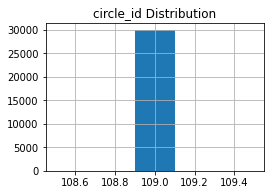

In [46]:
fig = plt.figure(figsize=(18, 6))
plt.subplot(2,4,1)
plt.title('circle_id Distribution')
telecom_df['circle_id'].hist(bins=5)

In [47]:
telecom_df.groupby('circle_id').count()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,average_recharge_good_phase,churn,count_rech_total_6,count_rech_total_7,count_rech_total_8,total_data_vol_mb_6,total_data_vol_mb_7,total_data_vol_mb_8,total_rech_data_amt_8,total_amount_8
circle_id,,,,,,,,,,,,,,,,,,,,,
109,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001


##### From the above two outputs (Chart and groupby), we can see that circle_id has only one column.

<AxesSubplot:title={'center':'arpu for 3 month from 6th month'}>

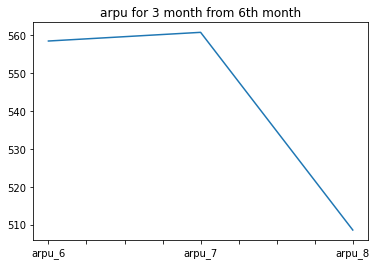

In [48]:
plt.title('arpu for 3 month from 6th month')
telecom_df[['arpu_6','arpu_7','arpu_8']].mean().plot()

##### From the above chart we can see the mean arpu was best in 6th month and drops down in the following months.

<AxesSubplot:title={'center':'Mean of all kinds of calls within same network minutes of usage'}>

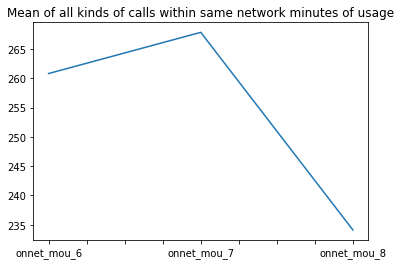

In [49]:
plt.title('Mean of all kinds of calls within same network minutes of usage')
telecom_df[['onnet_mou_6','onnet_mou_7','onnet_mou_8']].mean().plot()

##### From the above chart we can see that " Mean of All kinds of calls within same network" increases from 6th month to 7th month and then drops continouslly.  And the margin is between 1 to 8 approximately.

<AxesSubplot:title={'center':'Mean of all kinds of calls outside the network minutes of usage'}>

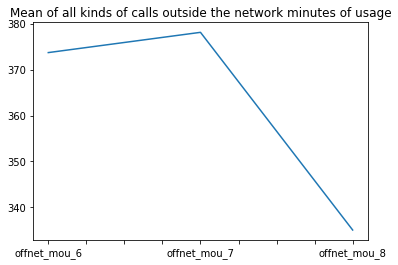

In [50]:
plt.title('Mean of all kinds of calls outside the network minutes of usage')
telecom_df[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].mean().plot()

##### From the above chart we can see that " Mean of All kinds of calls outside the  network" drop sequenially from 6th continously,  within the range of 1 to 14 approximately.

<AxesSubplot:title={'center':'Mean of Roaming outgoing calls minutes of usage'}>

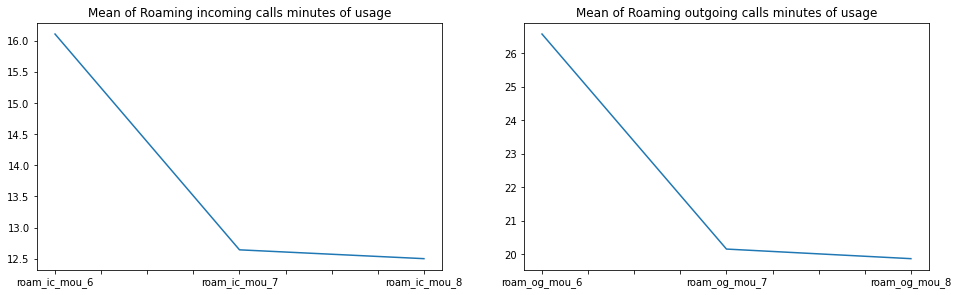

In [51]:
fig = plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
plt.title('Mean of Roaming incoming calls minutes of usage')
telecom_df[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8']].mean().plot()
plt.subplot(2,2,2)
plt.title('Mean of Roaming outgoing calls minutes of usage')
telecom_df[['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']].mean().plot()

##### From the above chart we can see that " Means of both Roaming incoming and outgoing calls minutes of usage" drop from 6th month to 7th and stays constant in 7th and 8th months.

<AxesSubplot:title={'center':'Mean of ISD outgoing calls minutes of usage'}>

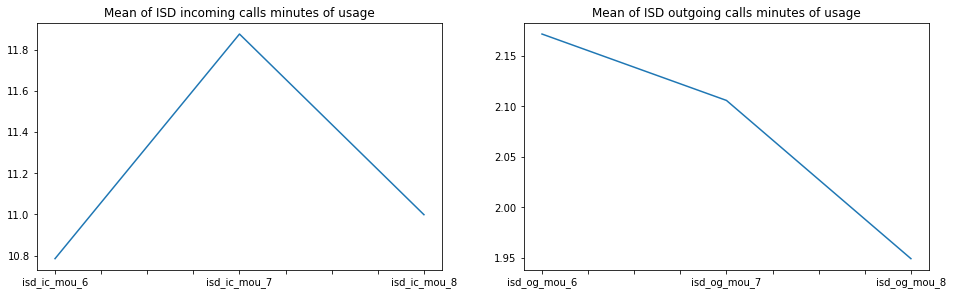

In [52]:
fig = plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
plt.title('Mean of ISD incoming calls minutes of usage')
telecom_df[['isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8']].mean().plot()
plt.subplot(2,2,2)
plt.title('Mean of ISD outgoing calls minutes of usage')
telecom_df[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8']].mean().plot()

##### From the above charts, we can see that Mean of ISD incoming calls minutes of usage increases from month 6 to month 7, but slightly goes down from month 7 to 8.  Whereas ISD outgoing calls minutes of usage decreases from month 6 to month 7 and stays almost constant at months 7 and 8.

<AxesSubplot:title={'center':'Mean of STD outgoing calls minutes of usage'}>

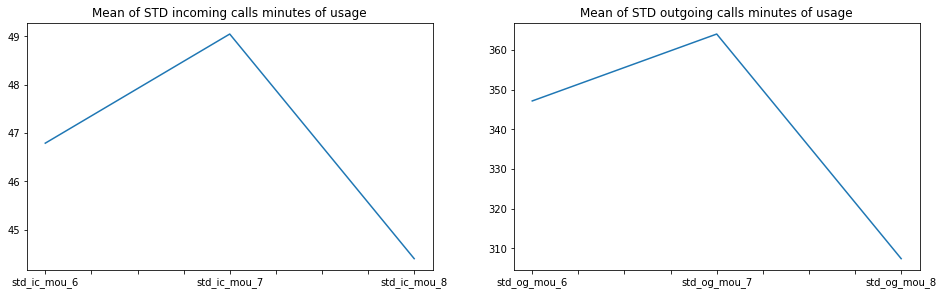

In [53]:
fig = plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
plt.title('Mean of STD incoming calls minutes of usage')
telecom_df[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8']].mean().plot()
plt.subplot(2,2,2)
plt.title('Mean of STD outgoing calls minutes of usage')
telecom_df[['std_og_mou_6','std_og_mou_7','std_og_mou_8']].mean().plot()

##### From the above charts, we can see that Mean of STD incoming calls as well as outgoing calls minutes of usage increases from month 6 to month 7, and drops from 7th to 8th month.

<AxesSubplot:title={'center':'Mean of Local outgoing calls minutes of usage'}>

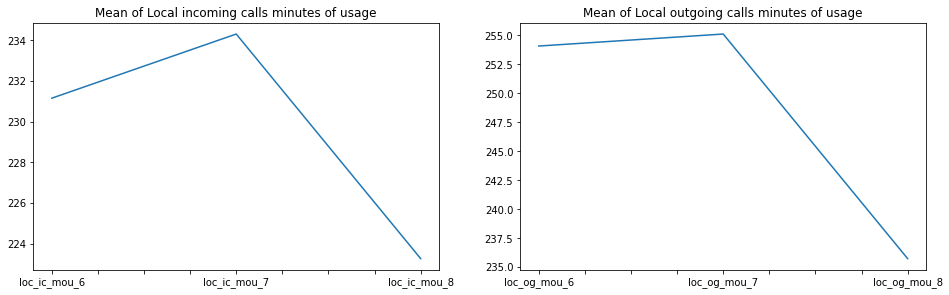

In [54]:
fig = plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
plt.title('Mean of Local incoming calls minutes of usage')
telecom_df[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']].mean().plot()
plt.subplot(2,2,2)
plt.title('Mean of Local outgoing calls minutes of usage')
telecom_df[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']].mean().plot()

##### From the above charts we can see that Mean of Local outgoing calls minutes of usage drops sequencially where as the mean of Local incoming calls slightly increases from month 6 to month. 7 and then decreases.

<AxesSubplot:title={'center':'fb usage for 3 month from 6th month'}>

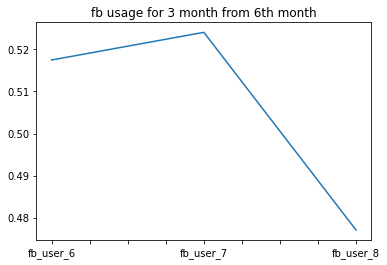

In [55]:
plt.title('fb usage for 3 month from 6th month')
telecom_df[['fb_user_6','fb_user_7','fb_user_8']].mean().plot()

##### From the above chart we can see that Facebook and similar social network usage increases sequentially from month 6 to month 8

<AxesSubplot:title={'center':'Total number of recharges made for 3 months from 6th month'}>

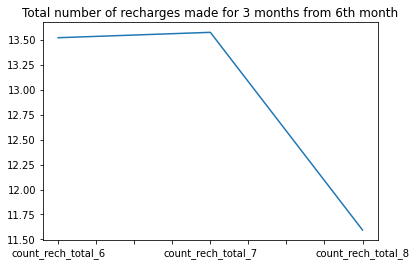

In [56]:
plt.title('Total number of recharges made for 3 months from 6th month')
telecom_df[['count_rech_total_6','count_rech_total_7','count_rech_total_8']].mean().plot()

#### From the above plot we can see slight drop in the total number of recharges done in the 8th month.

<AxesSubplot:title={'center':'Total data(2g+3g) volume used in 3 months from 6th month'}>

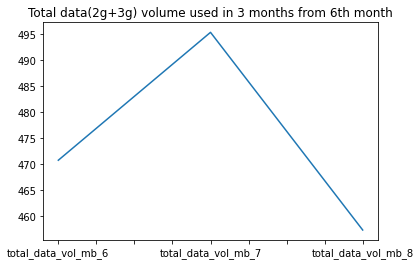

In [57]:
plt.title('Total data(2g+3g) volume used in 3 months from 6th month')
telecom_df[['total_data_vol_mb_6','total_data_vol_mb_7','total_data_vol_mb_8']].mean().plot()

#### From the above plot we can see that the usage of data does not change dramatically in the 3 months observed.

##### As we have seen that there is only one unique value for circle_id and hence will not provide meaningful information for our modelling and hence let us drop the colum from data frame.

In [58]:
telecom_df = telecom_df.drop(['circle_id'],axis=1)
telecom_df.shape

(30001, 175)

#### Let us look at the correlations using heatmap

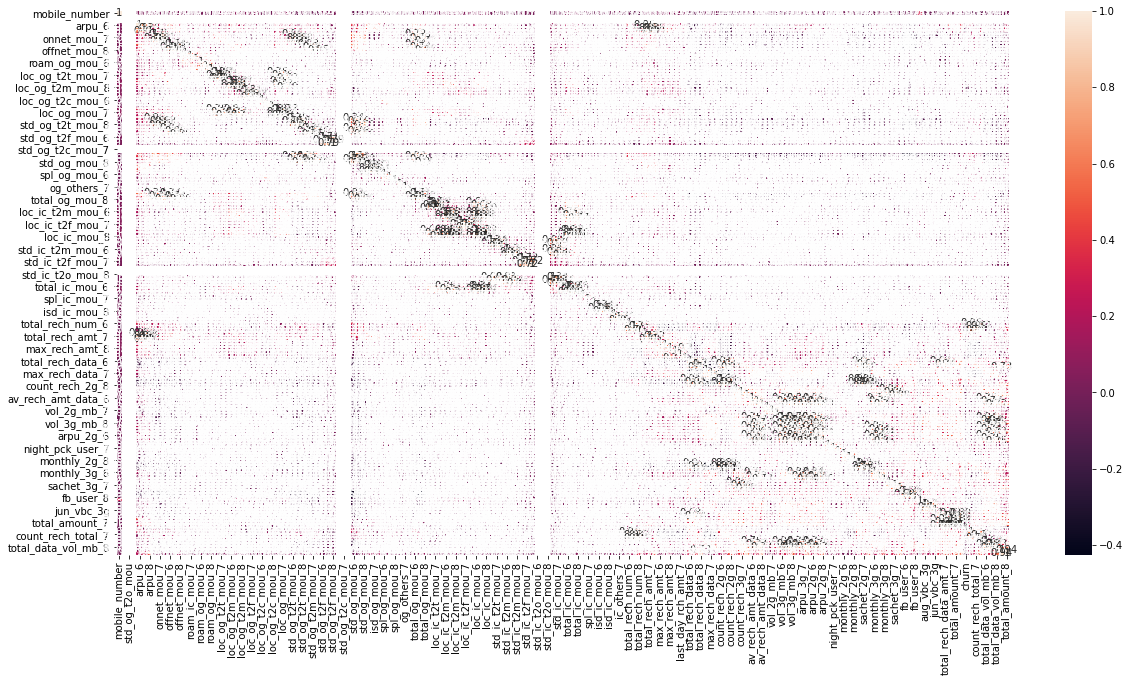

In [59]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom_df.corr(),annot = True)
plt.show()

#### As it is difficult to see the above heat map with all features, let us check the heat map in steps with subsets of columns at a time.

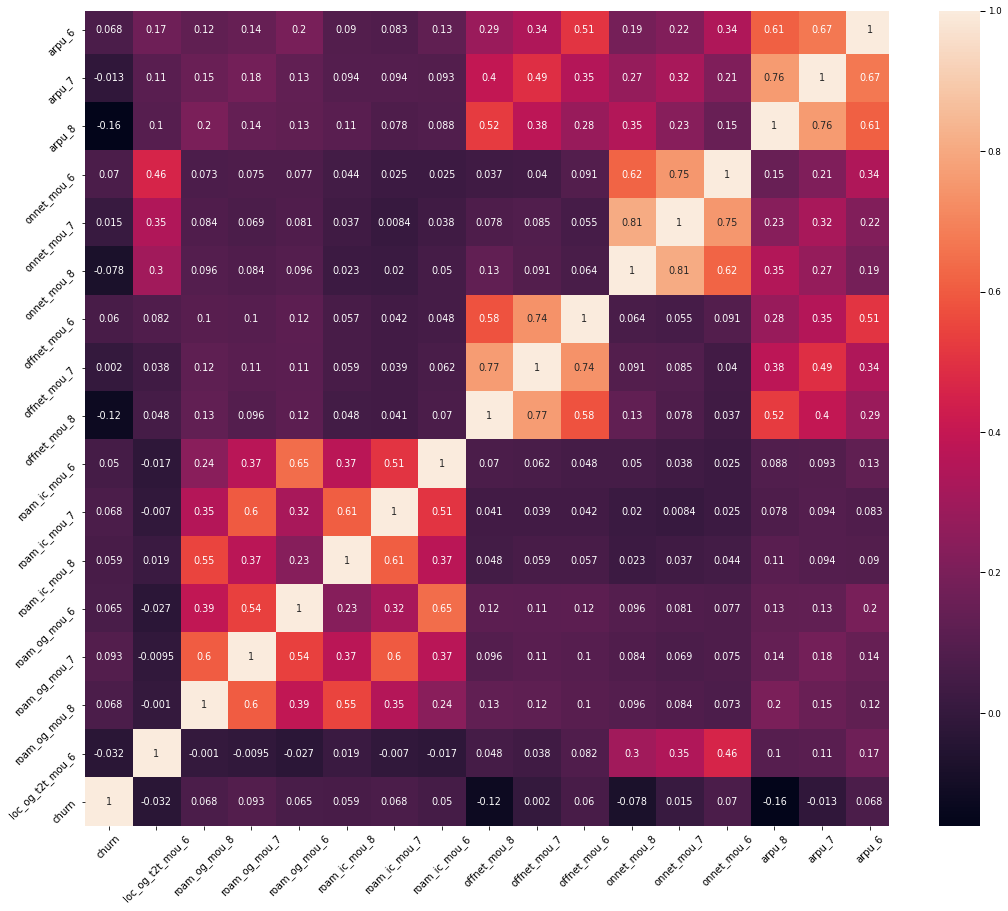

In [60]:
# Let's see the correlation matrix 
plt.figure(figsize = (18,15))        # Size of the figure
ax = plt.subplot(1,1,1)
sns.set_context("paper", font_scale=1)
sns.heatmap(telecom_df[[
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'churn']].corr(),annot = True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.set_ylim(17, 0.1)
ax.set_xlim(17, 0.1)
plt.show()

#### From the above plot we can see that churn is negatively correlated with arpu_8 and offnet_mou_8 (Average Revenue Per User and All kinds of calls outside the operator network) for the month of August (3rd month in our data set).

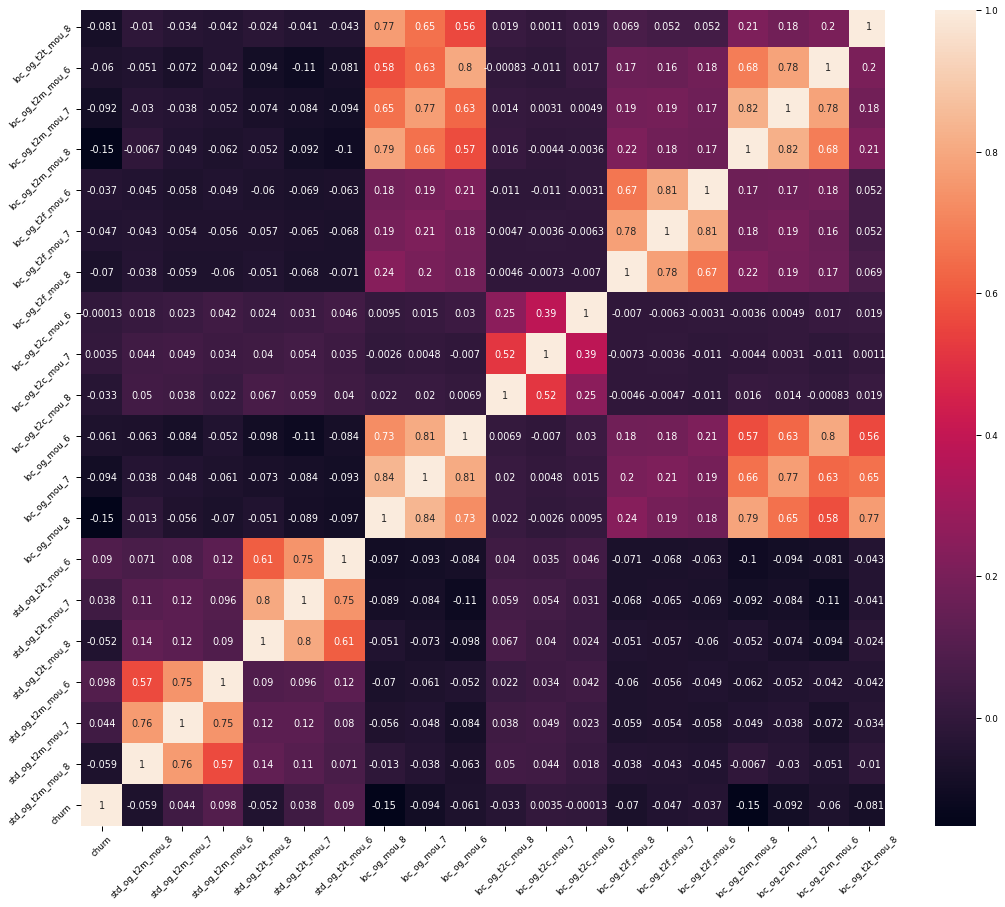

In [61]:
# Let's see the correlation matrix 
plt.figure(figsize = (18,15))        # Size of the figure
ax = plt.subplot(1,1,1)
sns.set_context("paper", font_scale=1)
sns.heatmap(telecom_df[[
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'churn']].corr(),annot = True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.set_ylim(20, 0.1)
ax.set_xlim(20, 0.1)
plt.show()

#### From the above plot we can see that churn is negatively correlated with loc_og_mou_8 and loc_og_t2m_mou_8 (Local outgoing alls and local outgoing calls to other operators mobile) for the month of August (3rd month in our data set.)

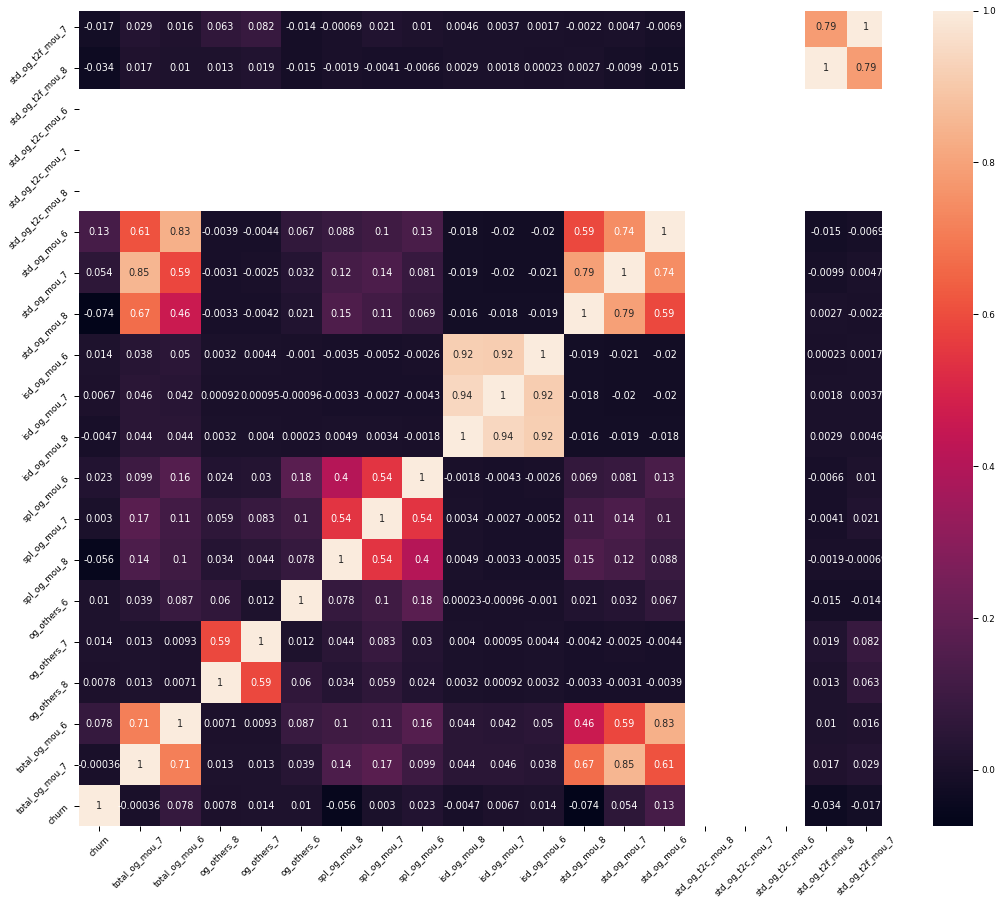

In [62]:
# Let's see the correlation matrix 
plt.figure(figsize = (18,15))        # Size of the figure
ax = plt.subplot(1,1,1)
sns.set_context("paper", font_scale=1)
sns.heatmap(telecom_df[[
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'churn']].corr(),annot = True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.set_ylim(20, 0.1)
ax.set_xlim(20, 0.1)
plt.show()

#### From the above plot we can see that churn is negatively correlated with std_og_mou_8 (STD outgoing calls Minutes of usage) for the month of August (3rd month in our data set).

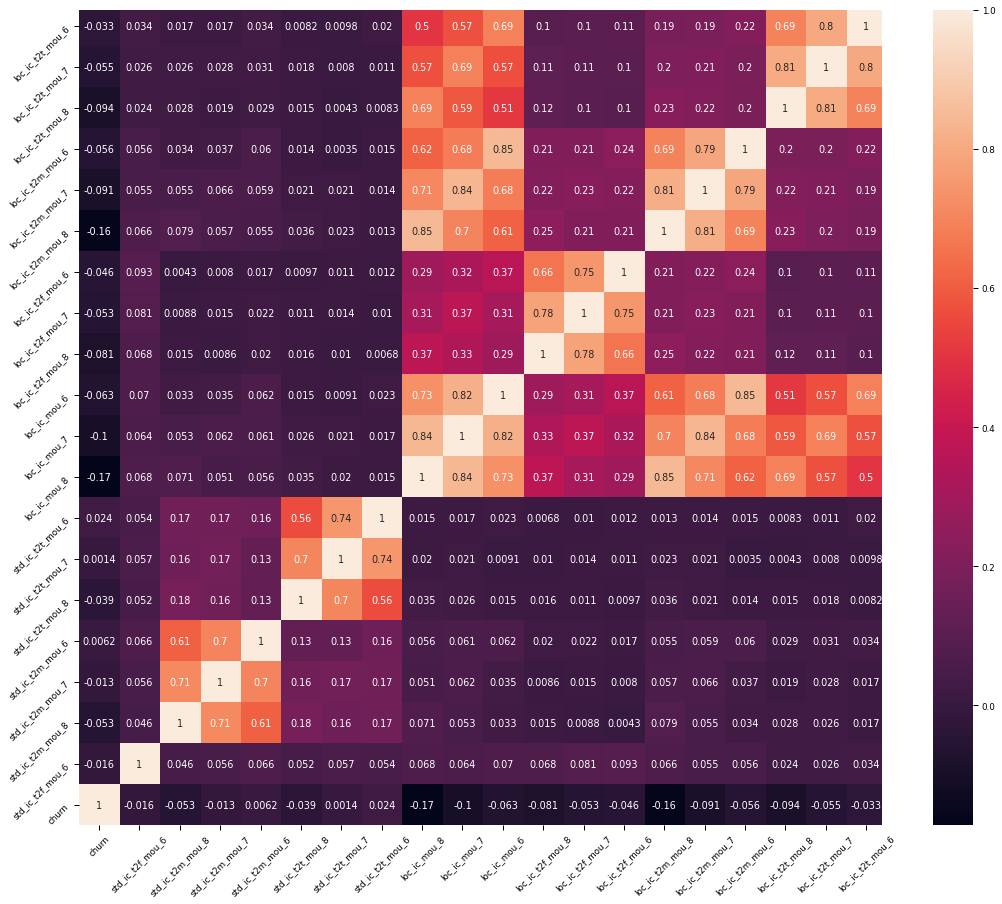

In [63]:
# Let's see the correlation matrix 
plt.figure(figsize = (18,15))        # Size of the figure
ax = plt.subplot(1,1,1)
sns.set_context("paper", font_scale=1)
sns.heatmap(telecom_df[[
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'churn']].corr(),annot = True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.set_ylim(20, 0.1)
ax.set_xlim(20, 0.1)
plt.show()

#### From the above plot we can see that churn is negatively correlated with loc_ic_mou_8 and loc_ic_t2m_mou_8(Local incoming calls and Local incoming calls from other opeators mobiles Minutes of usage) for the month of August (3rd month in our data set).

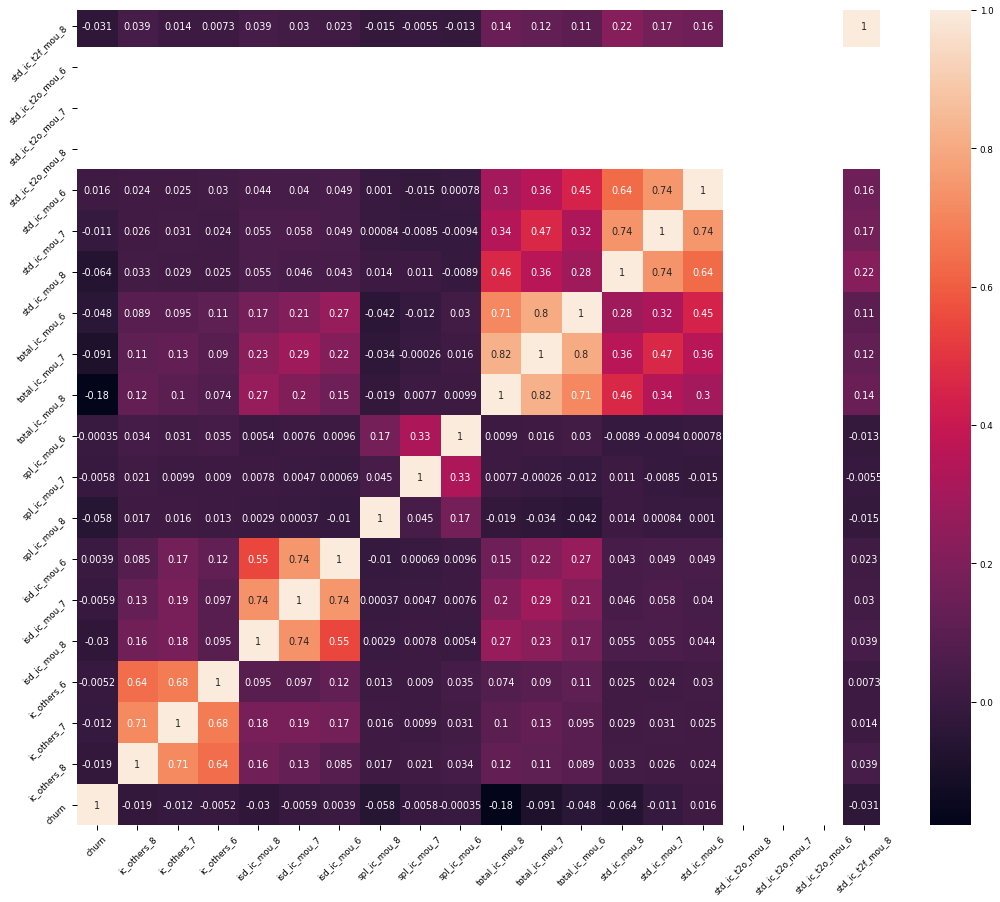

In [64]:
# Let's see the correlation matrix 
plt.figure(figsize = (18,15))        # Size of the figure
ax = plt.subplot(1,1,1)
sns.set_context("paper", font_scale=1)
sns.heatmap(telecom_df[[
       'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'churn']].corr(),annot = True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.set_ylim(20, 0.1)
ax.set_xlim(20, 0.1)
plt.show()

#### From the above plot we can see that churn is negatively correlated with tot_ic_mou_8 (Total incoming calls Minutes of usage) for the month of August (3rd month in our data set).

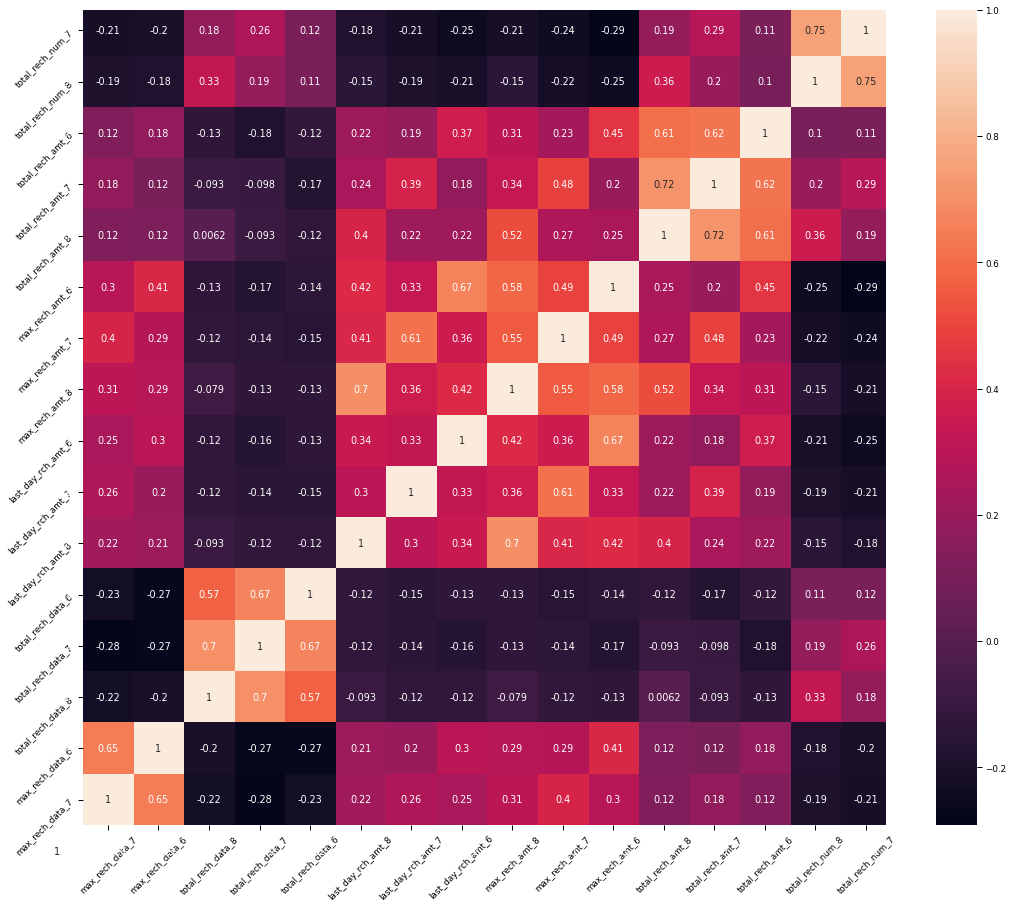

In [65]:
# Let's see the correlation matrix 
plt.figure(figsize = (18,15))        # Size of the figure
ax = plt.subplot(1,1,1)
sns.set_context("paper", font_scale=1)
sns.heatmap(telecom_df[[
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6',
       'max_rech_data_7', 'churn']].corr(),annot = True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.set_ylim(16, 0.1)
ax.set_xlim(16, 0.1)
plt.show()

#### From the above plot we can see that churn is negatively correlated with last_day_rch_amt_8, date_of_last_rech_8, max_rech_amt_8, total_rech_amt_8, total_rech_num_8 (All the recharge related features) for the month of August (3rd month in our data set).

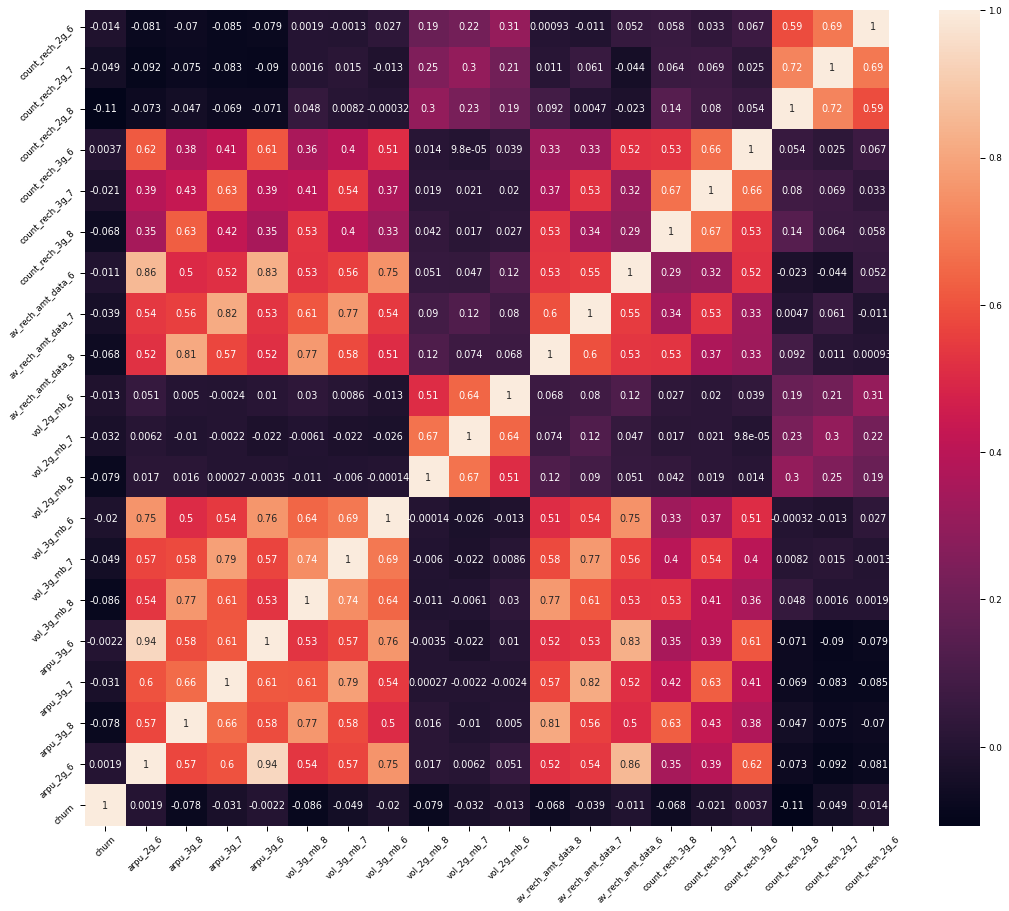

In [66]:
# Let's see the correlation matrix 
plt.figure(figsize = (18,15))        # Size of the figure
ax = plt.subplot(1,1,1)
sns.set_context("paper", font_scale=1)
sns.heatmap(telecom_df[[
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'churn']].corr(),annot = True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.set_ylim(20, 0.1)
ax.set_xlim(20, 0.1)
plt.show()

#### From the above plot we can see that churn is negatively correlated with av_rech_rch_amt_data_8 (Average recharge amount for data) for the month of August (3rd month in our data set).

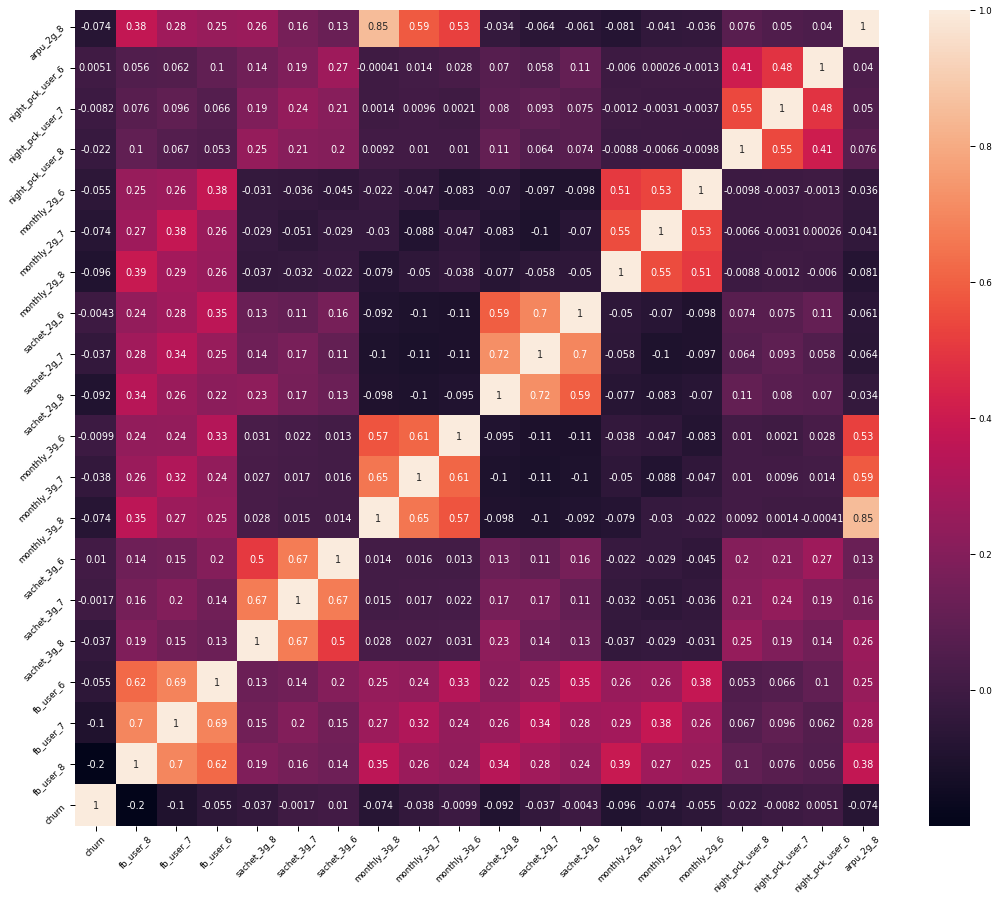

In [67]:
# Let's see the correlation matrix 
plt.figure(figsize = (18,15))        # Size of the figure
ax = plt.subplot(1,1,1)
sns.set_context("paper", font_scale=1)
sns.heatmap(telecom_df[[
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']].corr(),annot = True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.set_ylim(20, 0.1)
ax.set_xlim(20, 0.1)
plt.show()

#### From the above plot we can see that churn is negatively correlated with fb_user_8 (Facebook usage_data) for the month of August (3rd month in our data set).

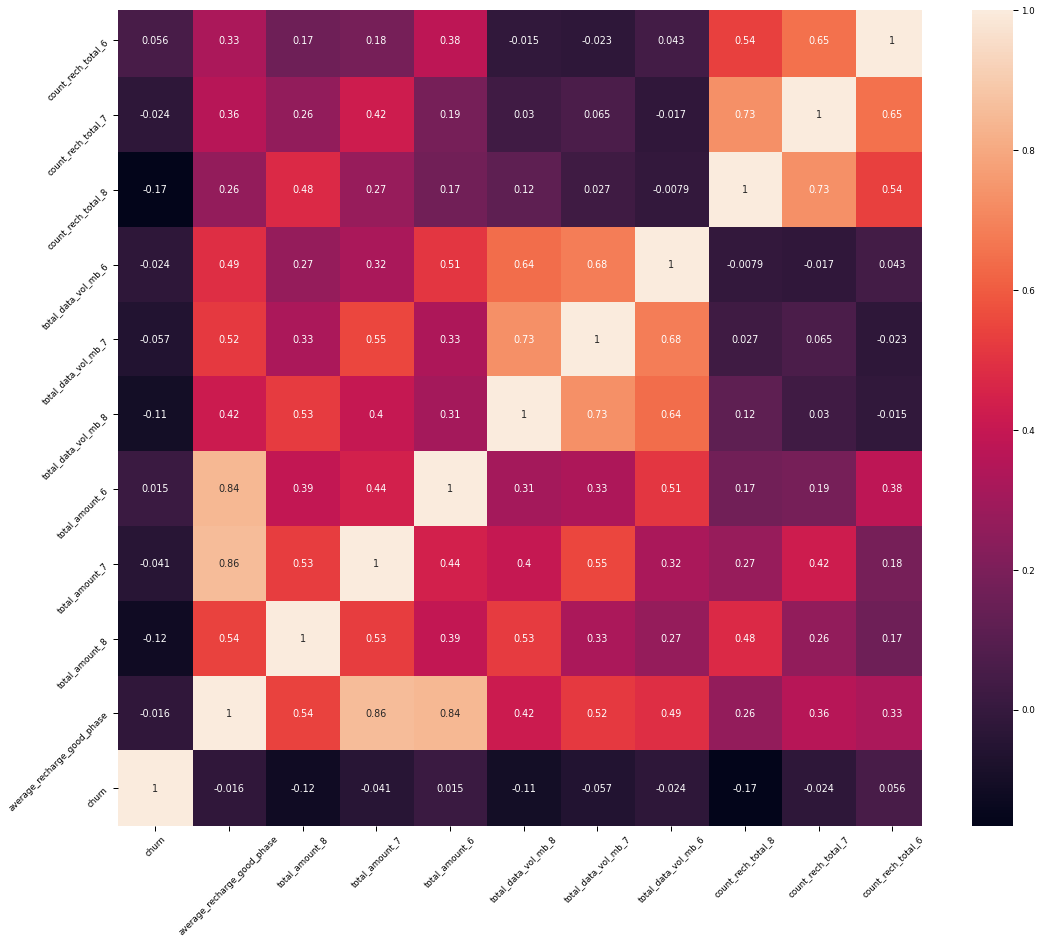

In [68]:
# Let's see the correlation matrix 
plt.figure(figsize = (18,15))        # Size of the figure
ax = plt.subplot(1,1,1)
sns.set_context("paper", font_scale=1)
sns.heatmap(telecom_df[[
       'count_rech_total_6', 'count_rech_total_7', 'count_rech_total_8', 
       'total_data_vol_mb_6', 'total_data_vol_mb_7', 'total_data_vol_mb_8', 
       'total_amount_6', 'total_amount_7', 'total_amount_8', 
       'average_recharge_good_phase', 'churn']].corr(),annot = True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.set_ylim(11, 0.1)
ax.set_xlim(11, 0.1)
plt.show()

#### From the above plot we can see that churn is negatively correlated with total_amount_8 (total amount used for recharging), total_data_vol_mb_8 (Total data used in MB) and count_rech_total_8 (total number of recharges) for the month of August (3rd month in our data set).

### Consolidating the information from all the above plots, we can say that churn is negatively correlated with arpu_8, offnet_mou_8,  loc_og_mou_8, loc_og_t2m_mou_8,  tot_ic_mou_8, std_og_mou_8, loc_ic_mou_8, loc_ic_t2m_mou_8, last_day_rch_amt_8, date_of_last_rech_8, max_rech_amt_8, total_rech_amt_8, total_rech_num_8, av_rech_rch_amt_data_8, fb_user_8, total_amount_8, total_data_vol_mb_8 and total_rech_num_8.  In all these features we can see one common attribute that they all belong to the month of August, (3rd month in out data set)

## Outlier treatment

In [69]:
telecom_df[['total_amount_6','total_amount_7', 'average_recharge_good_phase', 'count_rech_total_6',
            'count_rech_total_7', 'count_rech_total_8', 'total_data_vol_mb_6','total_data_vol_mb_7', 
            'total_data_vol_mb_8', 'total_amount_8']].describe(percentiles=[.01,.25,.5,.75,.99,.997,.999,.9999])

,total_amount_6,total_amount_7,average_recharge_good_phase,count_rech_total_6,count_rech_total_7,count_rech_total_8,total_data_vol_mb_6,total_data_vol_mb_7,total_data_vol_mb_8,total_amount_8
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000
mean,1116.509509,1188.731748,1152.620628,13.518716,13.572648,11.594780,470.780753,495.294027,457.40707,1047.618398
std,1566.112291,1632.174907,1358.713982,10.394270,10.661194,10.638616,967.603522,966.751929,967.75013,1804.608844
min,0.000000,0.000000,478.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1%,0.000000,0.000000,482.500000,2.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,546.000000,550.000000,603.000000,7.000000,7.000000,5.000000,0.000000,0.000000,0.00000,396.000000
50%,788.000000,812.000000,800.000000,11.000000,10.000000,9.000000,31.210000,58.130000,0.00000,688.000000
75%,1210.000000,1267.000000,1208.000000,17.000000,17.000000,15.000000,639.290000,674.000000,616.59000,1152.000000
99%,6305.000000,7163.000000,6090.500000,52.000000,53.000000,51.000000,4017.160000,4268.950000,4127.27000,6816.000000
99.7%,10876.000000,12492.000000,10941.000000,68.000000,71.000000,69.000000,6222.610000,6575.020000,6496.33000,12435.000000


#### We can see that beyond 99% percentile, we have outliers at the higher band.  Hence let us delete the outliers beyoind 99% quartile. 

In [70]:
PercentArea1 = np.percentile(telecom_df.total_amount_6, [0, 99])
PercentArea2 = np.percentile(telecom_df.total_amount_7, [0, 99])
PercentArea3 = np.percentile(telecom_df.average_recharge_good_phase, [0, 99])
PercentArea4 = np.percentile(telecom_df.count_rech_total_6, [0, 99])
PercentArea5 = np.percentile(telecom_df.count_rech_total_7, [0, 99])
PercentArea6 = np.percentile(telecom_df.count_rech_total_8, [0, 99])
PercentArea7 = np.percentile(telecom_df.total_data_vol_mb_6, [0, 99])
PercentArea8 = np.percentile(telecom_df.total_data_vol_mb_7, [0, 99])
PercentArea9 = np.percentile(telecom_df.total_data_vol_mb_8, [0, 99])
PercentArea10 = np.percentile(telecom_df.total_amount_8, [0, 99])

In [71]:
telecom_df = telecom_df[(telecom_df.total_amount_6 < PercentArea1[1])]
telecom_df = telecom_df[(telecom_df.total_amount_7 < PercentArea2[1])]
telecom_df = telecom_df[(telecom_df.average_recharge_good_phase < PercentArea3[1])]
telecom_df = telecom_df[(telecom_df.count_rech_total_6 < PercentArea4[1])]
telecom_df = telecom_df[(telecom_df.count_rech_total_7 < PercentArea5[1])]
telecom_df = telecom_df[(telecom_df.count_rech_total_8 < PercentArea6[1])]
telecom_df = telecom_df[(telecom_df.total_data_vol_mb_6 < PercentArea7[1])]
telecom_df = telecom_df[(telecom_df.total_data_vol_mb_7 < PercentArea8[1])]
telecom_df = telecom_df[(telecom_df.total_data_vol_mb_8 < PercentArea9[1])]
telecom_df = telecom_df[(telecom_df.total_amount_8 < PercentArea10[1])]

In [72]:
telecom_df[['total_amount_6','total_amount_7', 'average_recharge_good_phase', 'count_rech_total_6',
            'count_rech_total_7', 'count_rech_total_8', 'total_data_vol_mb_6','total_data_vol_mb_7', 
            'total_data_vol_mb_8', 'total_amount_8']].describe(percentiles=[.01,.25,.5,.75,.99,.997,.999,.9999])

,total_amount_6,total_amount_7,average_recharge_good_phase,count_rech_total_6,count_rech_total_7,count_rech_total_8,total_data_vol_mb_6,total_data_vol_mb_7,total_data_vol_mb_8,total_amount_8
count,28517.000000,28517.000000,28517.000000,28517.000000,28517.000000,28517.000000,28517.000000,28517.000000,28517.000000,28517.000000
mean,977.280892,1021.998600,999.639746,12.663183,12.609882,10.681173,387.442935,406.349192,369.600909,879.901746
std,752.148029,821.825883,634.159583,8.254538,8.475388,8.459356,610.262930,631.405758,619.359619,844.810934
min,0.000000,0.000000,478.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,482.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,540.000000,547.000000,596.500000,7.000000,7.000000,5.000000,0.000000,0.000000,0.000000,390.000000
50%,770.000000,790.000000,780.000000,10.000000,10.000000,8.000000,8.180000,24.720000,0.000000,668.000000
75%,1154.000000,1204.000000,1142.000000,16.000000,16.000000,14.000000,596.020000,623.200000,562.270000,1088.000000
99%,4060.000000,4286.620000,3584.420000,41.000000,41.000000,40.000000,2731.479200,2842.338800,2821.641200,4290.080000
99.7%,5162.904000,5753.164000,4374.054000,47.000000,46.000000,45.000000,3425.913400,3551.914200,3556.433320,5746.260000


In [73]:
telecom_df.shape

(28517, 175)

#### Now our data frame looks better with 28,517 rows.

#### Let us split the data into X and y. 

In [74]:
# Please note we are also dropping churn_criteria column which we have created in order to find churn flag.
X = telecom_df.drop(['churn'], axis=1)
y = telecom_df.pop('churn')

#### Let us split the data into train and test sets for our validation.  This will help us to measure the performance of our models on unseen data i.e. test data.  As our data set has sligtly higher number of rows, in order to reduce the time and resource requirement to train the models, let us split the train and test data sets with 30% and 70% data.

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, test_size=0.7, random_state=42)

#### Let us take mobile_number column separate as we do not want mobile_number as data affecting the churn rate.

In [76]:
X_train_mobile = X_train.pop('mobile_number')
print(X_train_mobile.head())
X_test_mobile = X_test.pop('mobile_number')
print(X_test_mobile.head())

28072    7001411813
97663    7001616659
37077    7002384150
84942    7001382086
96400    7002300221
Name: mobile_number, dtype: int64
44312    7001635195
59985    7000396645
7824     7000915199
11617    7001755657
36648    7000600430
Name: mobile_number, dtype: int64


#### Let us look at the churn rate of train and test(validation) sets

In [77]:
y_train_df = pd.DataFrame(y_train)
print('Train : \n',y_train_df['churn'].value_counts())
y_test_df = pd.DataFrame(y_test)
print('Test : \n', y_test_df['churn'].value_counts())

Train : 
 0    7879
1     676
Name: churn, dtype: int64
Test : 
 0    18320
1     1642
Name: churn, dtype: int64


In [78]:
print('Train Churn rate is : ',round(y_train_df[y_train_df['churn'] == 1].count() * 100 / y_train_df['churn'].count(), 2)) 
print('Test Churn rate is : ',round(y_test_df[y_test_df['churn'] == 1].count() * 100 / y_test_df['churn'].count(), 2))

Train Churn rate is :  churn    7.9
dtype: float64
Test Churn rate is :  churn    8.23
dtype: float64


#### As we have highly imbalanced classes, let us use SMOTE to handle class imbalance in train data set.

In [79]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 7879, 1: 7879})


##### After resampling the train data set, we now have equal number for both classes.

##### For simplicity, let us reassign sampled train sets with X_train and y_train

In [80]:
X_train = X_res
y_train = y_res

**Some information on PCA**

PCA or Principal Component Analysis is one of the most commonly used dimensionality reduction technique.  By converting large data sets into smaller ones containing fewer variables, it helps in improving model performance, visualising complex data sets, and in many more areas.

PCA can be used

- When the attributes of data are highly correlated
- when better data visualization is possible using less number of dimensions
- when number of dimensions need to be reduced.

Principal components are linear combinations of original variables.  Principal components are constructed to capture the maximum information. PCA is an unsupervised technique.

**Please note that after applying PCA "Independent variables become less interpretable**


#### As we are going to use PCA, it is important to scale all the numerical variables / features

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

#### Now, let us PCA and find the variables with cumulative ratio of around area just before it becomes flat

In [82]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(X_train)

array([[-1.38254239e+00,  5.80094005e+00, -3.98777849e-01, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.69698632e+00,  6.54611446e-01, -5.79205142e-01, ...,
        -2.40862079e-15, -8.57506483e-16, -2.18211497e-16],
       [-2.66420272e+00,  3.76125649e-01,  1.90024859e+00, ...,
         7.35930076e-16,  3.99342698e-16, -6.66530100e-16],
       ...,
       [ 3.53955805e+00, -2.11492030e+00,  2.41581641e+00, ...,
         4.21188121e-17, -5.96594308e-17,  4.70032297e-17],
       [-1.44278390e+00, -4.34570424e+00, -1.51425388e+00, ...,
         7.65256356e-17, -2.90168214e-17, -1.75142875e-17],
       [-2.88444849e+00, -2.16761179e+00,  4.18265930e-01, ...,
         3.82690660e-17,  3.08618431e-18, -2.67170717e-17]])

In [83]:
pca.components_

array([[-1.68651666e-19, -1.11022302e-16, -2.77555756e-16, ...,
         1.65060736e-01,  1.25085802e-01,  9.19685851e-02],
       [ 8.09192524e-19, -3.88578059e-16, -2.22044605e-16, ...,
         5.49866055e-02,  1.94276918e-02,  1.26257066e-01],
       [-8.28705217e-20,  2.77555756e-17, -4.51028104e-17, ...,
         2.28199901e-03,  1.36791092e-01,  1.16083987e-01],
       ...,
       [-0.00000000e+00,  1.00919354e-01,  5.78840066e-02, ...,
        -1.53161151e-01,  3.44994487e-15, -5.02028974e-15],
       [-0.00000000e+00,  8.11303312e-03, -4.62178470e-02, ...,
        -4.85713755e-02, -4.47883917e-16,  5.24103330e-16],
       [-0.00000000e+00, -6.78335461e-02,  7.88655604e-02, ...,
         1.22573359e-01,  1.51864198e-15, -2.14932239e-15]])

In [84]:
pca.explained_variance_ratio_

array([1.07915952e-01, 9.43722568e-02, 6.33473976e-02, 5.37660331e-02,
       3.73619621e-02, 3.12920954e-02, 2.88250941e-02, 2.58796677e-02,
       2.33689259e-02, 2.21018909e-02, 2.04538886e-02, 1.97472049e-02,
       1.92346034e-02, 1.81682716e-02, 1.70233046e-02, 1.54627215e-02,
       1.47585482e-02, 1.44128525e-02, 1.38159467e-02, 1.35583800e-02,
       1.26515677e-02, 1.15928272e-02, 1.06400363e-02, 1.04079948e-02,
       1.01892954e-02, 9.80100151e-03, 9.58232404e-03, 9.06873876e-03,
       8.64491800e-03, 8.59275551e-03, 8.27021515e-03, 8.14271723e-03,
       7.60477282e-03, 7.13024898e-03, 6.86069988e-03, 6.42503803e-03,
       6.25972523e-03, 6.13509224e-03, 5.99860842e-03, 5.88598234e-03,
       5.67346742e-03, 5.48262940e-03, 5.31675867e-03, 5.28491175e-03,
       5.19703999e-03, 4.94718099e-03, 4.83401820e-03, 4.72371124e-03,
       4.60608075e-03, 4.53374337e-03, 4.40981645e-03, 4.19805458e-03,
       3.96609546e-03, 3.76166819e-03, 3.75232963e-03, 3.55715675e-03,
      

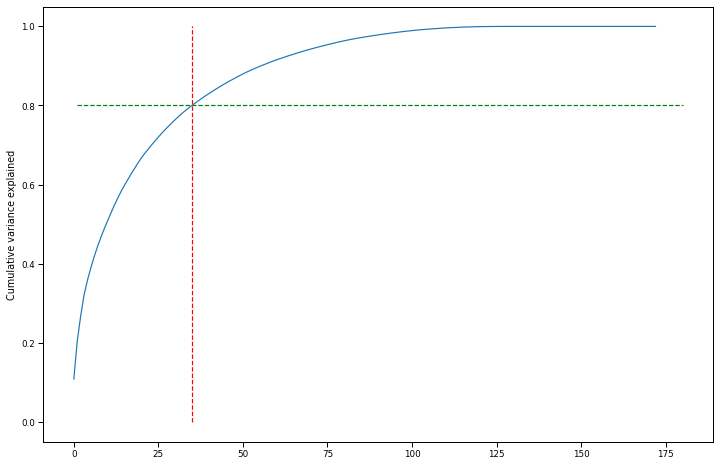

In [85]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[12,8])
plt.vlines(x=35, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.8, xmax=180, xmin=1, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

##### Out of 177 variables, 35 variables provides almost 80% of variance, before PCA area becomes too flat.

#### Now, we can see both train and test sets has 35 features which covers cumulative variance of 80%

In [86]:
pca_optimal = PCA(n_components=35,random_state=100)

Xtrain_reduced = pca_optimal.fit_transform(X_train)
Xtest_reduced = pca_optimal.transform(X_test)

print(Xtrain_reduced.shape)
print(Xtest_reduced.shape)

(15758, 35)
(19962, 35)


In [87]:
import time

### Now let us run the Logistic Regression and find the accuracy

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [88]:
import statsmodels.api as sms

X_train_lm = Xtrain_reduced
X_test_lm = Xtest_reduced

X_train_sm = sms.add_constant(X_train_lm)
logml = sms.GLM(y_train,X_train_sm, family = sms.families.Binomial())
res = logml.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                15758
Model:                            GLM   Df Residuals:                    15722
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5952.7
Date:                Fri, 23 Oct 2020   Deviance:                       11905.
Time:                        10:14:55   Pearson chi2:                 1.41e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3990      0.028    -14.269      0.000      -0.454      -0.344
x1            -0.2597      0.007    -38.161      0.000      -0.273      -0.246
x2            -0.4220      0.010    -42.442      0.000      -0.441      -0.403
x3            -0.2704      0.010    -28.262      0.000      -0.289      -0.252
x4            -0.2621      0.012    -21.847      0.000      -0.286      -0.239
x5             0.4625      0.012     37.463      0.000       0.438       0.487
x6             0.0121      0.016      0.776      0.438      -0.018       0.043
x7             0.1595      0.015     10.600      0.000       0.130       0.189
x8             0.0145      0.014      1.026      0.305      -0.013       0.042
x9            -0.4920      0.014    -34.711      0.000      -0.520      -0.464
x10           -0.0083      0.017     -0.488      0.626      -0.041       0.025
x11           -0.0965      0.020     -4.867      0.000      -0.135      -0.058
x12           -0.0120      0.020     -0.596      0.551      -0.052       0.028
x13            0.0785      0.019      4.062      0.000       0.041       0.116
x14            0.1322      0.023      5.877      0.000       0.088       0.176
x15           -0.1053      0.018     -5.860      0.000      -0.141      -0.070
x16           -0.0460      0.024     -1.955      0.051      -0.092       0.000
x17           -0.0336      0.021     -1.617      0.106      -0.074       0.007
x18            0.0830      0.019      4.314      0.000       0.045       0.121
x19           -0.1359      0.028     -4.917      0.000      -0.190      -0.082
x20            0.1021      0.020      5.147      0.000       0.063       0.141
x21           -0.1506      0.027     -5.493      0.000      -0.204      -0.097
x22           -0.2919      0.029    -10.126      0.000      -0.348      -0.235
x23            0.0547      0.032      1.690      0.091      -0.009       0.118
x24            0.1127      0.024      4.649      0.000       0.065       0.160
x25            0.0372      0.031      1.208      0.227      -0.023       0.098
x26            0.1264      0.037      3.459      0.001       0.055       0.198
x27           -0.3891      0.078     -4.991      0.000      -0.542      -0.236
x28           -0.0260      0.028     -0.918      0.359      -0.081       0.029
x29            0.0560      0.030      1.842      0.065      -0.004       0.116
x30           -0.0805      0.024     -3.296      0.001      -0.128      -0.033
x31           -0.1695      0.027     -6.342      0.000      -0.222      -0.117
x32            0.3825      0.032     12.134      0.000       0.321       0.444
x33           -0.0803      0.024     -3.297      0.001      -0.128      -0.033
x34           -0.5491      0.028    -19.581      0.000      -0.604      -0.494
x35           -0.1155      0.029     -3.956      0.000      -0.173      -0.058
==

In [89]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

array([0.00305175, 0.35320532, 0.14964028, 0.02215714, 0.03064271,
       0.07363531, 0.26584208, 0.20057478, 0.53827151, 0.00302347])

In [90]:
y_train_pred_final = pd.DataFrame({'churn':y_train, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,churn,Churn_Prob
0,0,0.003052
1,0,0.353205
2,0,0.149640
3,0,0.022157
4,0,0.030643


#### Now, let us look at the ROC Curve to find out optimal cut-off probability

In [91]:
from sklearn import metrics

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, 
                                          y_train_pred_final.Churn_Prob, drop_intermediate = False )

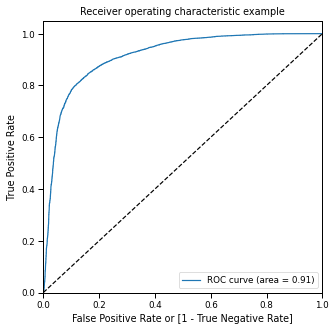

In [93]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.Churn_Prob)

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.  But in our case we want to see higher sensitivity rate.

In [94]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.003052,1,0,0,0,0,0,0,0,0,0
1,0,0.353205,1,1,1,1,0,0,0,0,0,0
2,0,0.149640,1,1,0,0,0,0,0,0,0,0
3,0,0.022157,1,0,0,0,0,0,0,0,0,0
4,0,0.030643,1,0,0,0,0,0,0,0,0,0


In [95]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.722046  0.981343  0.462749
0.2   0.2  0.775543  0.952786  0.598299
0.3   0.3  0.807209  0.923341  0.691078
0.4   0.4  0.828087  0.896053  0.760122
0.5   0.5  0.840462  0.859627  0.821297
0.6   0.6  0.842239  0.812413  0.872065
0.7   0.7  0.834433  0.758091  0.910775
0.8   0.8  0.796929  0.647798  0.946059
0.9   0.9  0.642213  0.304353  0.980074


#### At probability 0.5, we see both accuracy and sensitivity are approximately at 85%
##### Let's plot accuracy sensitivity and specificity for various probabilities.

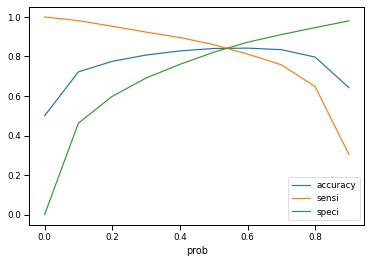

In [96]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.55 is the optimum point to take it as a cutoff probability.

In [97]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.55 else 0)

y_train_pred_final.head()

,churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.003052,1,0,0,0,0,0,0,0,0,0,0
1,0,0.353205,1,1,1,1,0,0,0,0,0,0,0
2,0,0.149640,1,1,0,0,0,0,0,0,0,0,0
3,0,0.022157,1,0,0,0,0,0,0,0,0,0,0
4,0,0.030643,1,0,0,0,0,0,0,0,0,0,0


#### Let us predict test data churn and find accuracy

In [98]:
start = time.time()

X_test_sm = sms.add_constant(Xtest_reduced)

y_test_pred = res.predict(X_test_sm)
print(y_test_pred[:10])

y_test_pred_final = pd.DataFrame({'churn':y_test.values, 'Churn_Prob':y_test_pred})
print(y_test_pred_final.head())

y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.55 else 0)

# Let's see the head
print(y_test_pred_final.head())

# Confusion matrix of test set
confusion = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.predicted )
print(confusion)

# Let's check the overall test accuracy.
print('Test accuracy : ',metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.predicted))
time_taken = time.time() - start

[7.32342655e-211 1.00000000e+000 0.00000000e+000 7.45038954e-026
 1.43659859e-117 0.00000000e+000 7.12544751e-079 0.00000000e+000
 1.00000000e+000 4.64053069e-242]
   churn     Churn_Prob
0      0  7.323427e-211
1      0   1.000000e+00
2      0   0.000000e+00
3      0   7.450390e-26
4      0  1.436599e-117
   churn     Churn_Prob  predicted
0      0  7.323427e-211          0
1      0   1.000000e+00          1
2      0   0.000000e+00          0
3      0   7.450390e-26          0
4      0  1.436599e-117          0
[[15330  2990]
 [  381  1261]]
Test accuracy :  0.8311291453762149


In [99]:
all_models = pd.DataFrame()

new_row = pd.DataFrame([pd.Series(['Logistic Regression', 
                       round(metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted),2),
                       round(metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.predicted),2),
                       round(metrics.recall_score(y_train_pred_final.churn, y_train_pred_final.predicted),2),
                       round(metrics.recall_score(y_test_pred_final.churn, y_test_pred_final.predicted),2),
                       round(metrics.f1_score(y_train_pred_final.churn, y_train_pred_final.predicted),2),
                       round(metrics.f1_score(y_test_pred_final.churn, y_test_pred_final.predicted),2),
                                  round(time_taken,2)])])
all_models = pd.concat([new_row, all_models], ignore_index=True)
all_models.columns = ['Model name','train accuracy','test accuracy', 'train recall', 'test recall', 'train f1', 'test f1', 'time taken in secs']

In [100]:
all_models.head()

,Model name,train accuracy,test accuracy,train recall,test recall,train f1,test f1,time taken in secs
0,Logistic Regression,0.84,0.83,0.84,0.77,0.84,0.43,0.07


### Now let us use Decision Trees to model with hyper parameter tuning

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

X_train_tree = Xtrain_reduced
X_test_tree = Xtest_reduced

# Create the parameter grid based on the results of random search 
param_grid = {"criterion": ["gini"],
              "splitter": ["best", "random"],
              "max_depth"        : [ 10, 15, 20],
              "min_samples_split": [ 1000, 2000, 5000, 6000, 7000, 8000],
              "min_samples_leaf": [ 100, 200, 300, 400, 500, 600, 700],
              "max_features"        : ["auto", "sqrt", "log2"]}

tree = DecisionTreeClassifier()

folds = 3
param_comb = 5
scoring_set = {'Recall': make_scorer(recall_score), 'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 100)

random_search = RandomizedSearchCV(tree, param_distributions=param_grid, n_iter=param_comb, 
                                   scoring=scoring_set, refit='Recall', n_jobs=-1, 
                                   cv=skf.split(X_train_tree,y_train), 
                                   verbose=3, random_state=1001 )


In [102]:
random_search.fit(X_train_tree,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.5s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fe5aefc5dd0>,
                   estimator=DecisionTreeClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [10, 15, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [100, 200, 300, 400,
                                                             500, 600, 700],
                                        'min_samples_split': [1000, 2000, 5000,
                                                              6000, 7000,
                                                              8000],
                                        'splitter': ['best', 'random']},
                   random_state=1001, refit='Recall',
                   scoring={'Accuracy': make_scorer(accuracy_score),
 

In [103]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 All results:
{'mean_fit_time': array([0.02111634, 0.03578599, 0.02430169, 0.01294645, 0.02835917]), 'std_fit_time': array([0.00129044, 0.00550351, 0.00511744, 0.00161428, 0.00355171]), 'mean_score_time': array([0.01149742, 0.01274832, 0.00973002, 0.01168235, 0.00852784]), 'std_score_time': array([0.00069889, 0.00061814, 0.00385448, 0.000874  , 0.00159195]), 'param_splitter': masked_array(data=['random', 'best', 'best', 'random', 'best'],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_split': masked_array(data=[7000, 8000, 8000, 8000, 6000],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[200, 300, 200, 500, 200],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=['log2', 'auto', 'auto', 'log2', 'auto'],
           

#### Let us model using tree with best hyperparameters

In [104]:
start = time.time()

tree = DecisionTreeClassifier(splitter= 'best', min_samples_split= 5000, min_samples_leaf= 100, 
                              max_features= 'log2', max_depth= 20, criterion= 'gini')

tree.fit(X_train_tree, y_train)
y_train_tree = tree.predict(X_train_tree) 
y_test_tree = tree.predict(X_test_tree) 
tree.score(X_test_tree,y_test_tree)
time_taken = time.time() - start

In [105]:
print('Train confusion matrix : \n',confusion_matrix(y_train,y_train_tree))
print('Test confusion matrix : \n',confusion_matrix(y_test,y_test_tree))

print('Train accuracy : ',round(metrics.accuracy_score(y_train,y_train_tree),2))
print('Test accuracy : ',round(metrics.accuracy_score(y_test,y_test_tree),2))

print('Train recall : ',round(metrics.recall_score(y_train,y_train_tree),2))
print('Test recall :',round(metrics.recall_score(y_test,y_test_tree),2))

Train confusion matrix : 
 [[5497 2382]
 [2498 5381]]
Test confusion matrix : 
 [[18320     0]
 [ 1642     0]]
Train accuracy :  0.69
Test accuracy :  0.92
Train recall :  0.68
Test recall : 0.0


In [106]:
new_row = pd.DataFrame([['Decision Trees', 
                         round(metrics.accuracy_score(y_train, y_train_tree),2),
                         round(metrics.accuracy_score(y_test, y_test_tree),2),
                         round(metrics.recall_score(y_train, y_train_tree),2),
                         round(metrics.recall_score(y_test, y_test_tree),2),
                         round(metrics.f1_score(y_train, y_train_tree),2),
                         round(metrics.f1_score(y_test, y_test_tree),2),
                        round(time_taken, 2)]], columns=all_models.columns)
all_models = all_models.append(new_row)
all_models.head()

,Model name,train accuracy,test accuracy,train recall,test recall,train f1,test f1,time taken in secs
0,Logistic Regression,0.84,0.83,0.84,0.77,0.84,0.43,0.07
0,Decision Trees,0.69,0.92,0.68,0.00,0.69,0.00,0.06


### Let us model using RandomForests

In [107]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Let us use gini criterion as it is comparatively faster than entropy.
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(10,30,10),
    'min_samples_leaf': range(5, 15, 5),
    'min_samples_split': range(5, 15, 5),
    'n_estimators': [100], 
    'max_features': range(10,30,10)
}
# Create a based model
rf = RandomForestClassifier(bootstrap=True, criterion="gini")

scoring_set = {'Recall': make_scorer(recall_score), 'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring= scoring_set, refit='Recall',
                          cv = 5, n_jobs = -1,verbose = 1)

In [108]:
# Fit the grid search to the data   #. Runs for approximately one hour duration
start = time.time()
grid_search.fit(Xtrain_reduced, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  7.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 30, 10),
                         'max_features': range(10, 30, 10),
                         'min_samples_leaf': range(5, 15, 5),
                         'min_samples_split': range(5, 15, 5),
                         'n_estimators': [100]},
             refit='Recall',
             scoring={'Accuracy': make_scorer(accuracy_score),
                      'F1': make_scorer(f1_score),
                      'Recall': make_scorer(recall_score)},
             verbose=1)

In [109]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9541821771009589 using {'max_depth': 20, 'max_features': 20, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}


#### Now let us model with the best parameters obtained from grid search using RandomForests

In [110]:
rfc = RandomForestClassifier(bootstrap=True, 
                             criterion="gini",
                             max_depth=20,
                             max_features=10,
                             min_samples_leaf=5, 
                             min_samples_split=10,
                             n_estimators=100)

# fit
rfc.fit(Xtrain_reduced,y_train)

# predict
predictions_train = rfc.predict(Xtrain_reduced)

predictions_test = rfc.predict(Xtest_reduced)
time_taken = time.time() - start

In [111]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

print('Train confusion matrix : \n',confusion_matrix(y_train,predictions_train))
print('Test confusion matrix : \n',confusion_matrix(y_test,predictions_test))

print('Train accuracy : ',round(metrics.accuracy_score(y_train,predictions_train),2))
print('Test accuracy : ',round(metrics.accuracy_score(y_test,predictions_test),2))

print('Train recall : ',round(metrics.recall_score(y_train,predictions_train),2))
print('Test recall :',round(metrics.recall_score(y_test,predictions_test),2))

Train confusion matrix : 
 [[7679  200]
 [  22 7857]]
Test confusion matrix : 
 [[17472   848]
 [ 1264   378]]
Train accuracy :  0.99
Test accuracy :  0.89
Train recall :  1.0
Test recall : 0.23


In [112]:
new_row = pd.DataFrame([['RandomForests', 
                         round(metrics.accuracy_score(y_train, predictions_train),2),
                         round(metrics.accuracy_score(y_test, predictions_test),2), 
                         round(metrics.recall_score(y_train, predictions_train),2),
                         round(metrics.recall_score(y_test, predictions_test),2),
                         round(metrics.f1_score(y_train, predictions_train),2),
                         round(metrics.f1_score(y_test, predictions_test),2),
                        round(time_taken, 2)]], columns=all_models.columns)
all_models = all_models.append(new_row)
all_models.head()

,Model name,train accuracy,test accuracy,train recall,test recall,train f1,test f1,time taken in secs
0,Logistic Regression,0.84,0.83,0.84,0.77,0.84,0.43,0.07
0,Decision Trees,0.69,0.92,0.68,0.00,0.69,0.00,0.06
0,RandomForests,0.99,0.89,1.00,0.23,0.99,0.26,507.60


### Now let us model using StackingClassifier

In [113]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

X_train_stack = Xtrain_reduced
X_test_stack = Xtest_reduced

# parameter grid
param_grid = {
              "stack_method": ['auto', 'predict_proba', 'decision_function', 'predict'],
             }

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, max_samples=500, random_state=42)),
    ('svr', LinearSVC(random_state=42)),
    ('sgd', SGDClassifier(eta0=0.9, learning_rate='adaptive', loss='squared_hinge', penalty='l2', random_state=42)),
    ('ridge', RidgeClassifier(alpha=10, solver='lsqr', random_state=42))
]
    
stack = StackingClassifier(passthrough=False, cv=5,
                           estimators=estimators, final_estimator=LogisticRegression())

scoring_set = {'Recall': make_scorer(recall_score), 'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}

# run grid search
folds = 5
grid_search_bag = GridSearchCV(stack, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = scoring_set,
                               refit = 'Recall',
                               return_train_score=True,
                               n_jobs = -1,
                               verbose = 1)

In [114]:
# fit   # Runs for approximately one hour duration
start = time.time()
grid_search_bag.fit(X_train_stack, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.8min finished


GridSearchCV(cv=5,
             estimator=StackingClassifier(cv=5,
                                          estimators=[('rf',
                                                       RandomForestClassifier(max_samples=500,
                                                                              random_state=42)),
                                                      ('svr',
                                                       LinearSVC(random_state=42)),
                                                      ('sgd',
                                                       SGDClassifier(eta0=0.9,
                                                                     learning_rate='adaptive',
                                                                     loss='squared_hinge',
                                                                     random_state=42)),
                                                      ('ridge',
                                                       

In [115]:
print('\n All results:')
print(grid_search_bag.cv_results_)
print('\n Best estimator:')
print(grid_search_bag.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(grid_search_bag.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(grid_search_bag.best_params_)
results = pd.DataFrame(grid_search_bag.cv_results_)


 All results:
{'mean_fit_time': array([32.8565352 ,  6.52786045,  6.72931957, 28.91132402]), 'std_fit_time': array([0.52512182, 0.13102606, 0.27271722, 5.15014087]), 'mean_score_time': array([0.08166561, 0.        , 0.        , 0.06767664]), 'std_score_time': array([0.00366897, 0.        , 0.        , 0.01879301]), 'param_stack_method': masked_array(data=['auto', 'predict_proba', 'decision_function',
                   'predict'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'stack_method': 'auto'}, {'stack_method': 'predict_proba'}, {'stack_method': 'decision_function'}, {'stack_method': 'predict'}], 'split0_test_Recall': array([0.84010152,        nan,        nan, 0.80837563]), 'split1_test_Recall': array([0.88324873,        nan,        nan, 0.86040609]), 'split2_test_Recall': array([0.85088832,        nan,        nan, 0.83312183]), 'split3_test_Recall': array([0.85904762,        nan,        nan, 0.8368254 ]), 'split4_t

#### Now let us model using StackingClassifier with hyperparameters

In [116]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, max_samples=500, random_state=42)),
    ('svr', LinearSVC(random_state=42)),
    ('sgd', SGDClassifier(eta0=0.9, learning_rate='adaptive', loss='squared_hinge', penalty='l2', random_state=42)),
    ('ridge', RidgeClassifier(alpha=10, solver='lsqr', random_state=42))
]
    
stack = StackingClassifier(passthrough=False, stack_method='auto', cv=5,
                           estimators=estimators, final_estimator=RidgeClassifier())

stack.fit(X_train_stack, y_train)
y_train_stack = stack.predict(X_train_stack) 
y_test_stack = stack.predict(X_test_stack) 
stack.score(X_test_stack,y_test_stack)
time_taken = time.time() - start

In [117]:
print('Train confusion matrix : \n',confusion_matrix(y_train,y_train_stack))
print('Test confusion matrix : \n',confusion_matrix(y_test,y_test_stack))

print('Train accuracy : ',round(metrics.accuracy_score(y_train,y_train_stack),2))
print('Test accuracy : ',round(metrics.accuracy_score(y_test,y_test_stack),2))

print('Train recall : ',round(metrics.recall_score(y_train,y_train_stack),2))
print('Test recall :',round(metrics.recall_score(y_test,y_test_stack),2))

Train confusion matrix : 
 [[6951  928]
 [1030 6849]]
Test confusion matrix : 
 [[14885  3435]
 [  352  1290]]
Train accuracy :  0.88
Test accuracy :  0.81
Train recall :  0.87
Test recall : 0.79


In [118]:
new_row = pd.DataFrame([['StackingClassifier', 
                         round(metrics.accuracy_score(y_train, y_train_stack),2),
                         round(metrics.accuracy_score(y_test, y_test_stack),2), 
                         round(metrics.recall_score(y_train, y_train_stack),2),
                         round(metrics.recall_score(y_test, y_test_stack),2),
                         round(metrics.f1_score(y_train, y_train_stack),2),
                         round(metrics.f1_score(y_test, y_test_stack),2),
                        round(time_taken, 2)]], columns=all_models.columns)
all_models = all_models.append(new_row)
all_models

,Model name,train accuracy,test accuracy,train recall,test recall,train f1,test f1,time taken in secs
0,Logistic Regression,0.84,0.83,0.84,0.77,0.84,0.43,0.07
0,Decision Trees,0.69,0.92,0.68,0.00,0.69,0.00,0.06
0,RandomForests,0.99,0.89,1.00,0.23,0.99,0.26,507.60
0,StackingClassifier,0.88,0.81,0.87,0.79,0.87,0.41,148.34


### Now let us model using BaggingClassifier

In [119]:
X_train_bag = Xtrain_reduced
X_test_bag = Xtest_reduced

In [120]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

# parameter grid
param_grid = {"max_samples" : [750, 1000, 2000, 5000],
              "max_features" : [10, 20, 30],
              "n_estimators": [300, 500, 1000, 2000],
             }

# base estimator
lg = RidgeClassifier(solver='lsqr', alpha=10)

bag = BaggingClassifier(
    base_estimator=lg)

scoring_set = {'Recall': make_scorer(recall_score), 'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}

# run grid search
folds = 3
grid_search_bag = GridSearchCV(bag, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = scoring_set,
                               refit = 'Recall',
                               return_train_score=True,
                               n_jobs = -1,
                               verbose = 1)

In [121]:
# fit   
start = time.time()
grid_search_bag.fit(X_train_bag, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 42.4min finished


GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=RidgeClassifier(alpha=10,
                                                                        solver='lsqr')),
             n_jobs=-1,
             param_grid={'max_features': [10, 20, 30],
                         'max_samples': [750, 1000, 2000, 5000],
                         'n_estimators': [300, 500, 1000, 2000]},
             refit='Recall', return_train_score=True,
             scoring={'Accuracy': make_scorer(accuracy_score),
                      'F1': make_scorer(f1_score),
                      'Recall': make_scorer(recall_score)},
             verbose=1)

In [122]:
print('\n All results:')
print(grid_search_bag.cv_results_)
print('\n Best estimator:')
print(grid_search_bag.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(grid_search_bag.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(grid_search_bag.best_params_)
results = pd.DataFrame(grid_search_bag.cv_results_)


 All results:
{'mean_fit_time': array([ 5.05579265,  7.15807994, 13.84412567, 27.26971165,  4.11428817,
        6.67328715, 14.0288047 , 27.63827411,  4.26531498,  6.56420668,
       14.2888906 , 28.21209915,  4.99500505,  9.76918793, 20.01472521,
       42.50405137,  9.2139593 , 10.58373125, 21.70790188, 81.74636189,
       16.5109361 , 14.99857783, 28.83305788, 56.2624433 ,  8.91079998,
       10.11772807, 24.14607302, 55.31311544,  8.16192484,  9.50366513,
       20.86625576, 48.67744772, 12.86455735, 26.91531165, 44.93653798,
       74.77751557, 12.84368666, 16.1762685 , 41.47613009, 90.69672275,
       14.96554573, 23.28588263, 42.13292631, 85.83766063, 13.17633573,
       17.63083029, 45.29833213, 76.65250834]), 'std_fit_time': array([2.26650057e-02, 1.44925462e-01, 2.18359040e-01, 3.71695286e-01,
       2.05890757e-01, 1.74421096e-02, 2.02438652e-01, 9.13889839e-01,
       1.92134323e-01, 4.24210028e-02, 6.86808763e-01, 5.89864031e-01,
       8.51026782e-01, 8.03266295e-01, 3.8

##### Model using BaggingClassifier with hyper parameters

In [123]:
bag = BaggingClassifier(
    base_estimator=lg,
    max_features=30,
    max_samples=750,
    n_estimators=2000)

bag.fit(X_train_bag, y_train)
y_train_bag = bag.predict(X_train_bag) 
y_test_bag = bag.predict(X_test_bag) 
bag.score(X_test_bag,y_test_bag)
time_taken = time.time() - start

In [124]:
print('Train confusion matrix : \n',confusion_matrix(y_train,y_train_bag))
print('Test confusion matrix : \n',confusion_matrix(y_test,y_test_bag))

print('Train accuracy : ',round(metrics.accuracy_score(y_train,y_train_bag),2))
print('Test accuracy : ',round(metrics.accuracy_score(y_test,y_test_bag),2))

print('Train recall : ',round(metrics.recall_score(y_train,y_train_bag),2))
print('Test recall :',round(metrics.recall_score(y_test,y_test_bag),2))

Train confusion matrix : 
 [[6252 1627]
 [ 997 6882]]
Test confusion matrix : 
 [[14402  3918]
 [  310  1332]]
Train accuracy :  0.83
Test accuracy :  0.79
Train recall :  0.87
Test recall : 0.81


In [125]:
new_row = pd.DataFrame([['Bagging Classifier', 
                         round(metrics.accuracy_score(y_train, y_train_bag),2),
                         round(metrics.accuracy_score(y_test, y_test_bag),2), 
                         round(metrics.recall_score(y_train, y_train_bag),2),
                         round(metrics.recall_score(y_test, y_test_bag),2),
                         round(metrics.f1_score(y_train, y_train_bag),2),
                         round(metrics.f1_score(y_test, y_test_bag),2),
                        round(time_taken ,2)]], columns=all_models.columns)
all_models = all_models.append(new_row)
all_models

,Model name,train accuracy,test accuracy,train recall,test recall,train f1,test f1,time taken in secs
0,Logistic Regression,0.84,0.83,0.84,0.77,0.84,0.43,0.07
0,Decision Trees,0.69,0.92,0.68,0.00,0.69,0.00,0.06
0,RandomForests,0.99,0.89,1.00,0.23,0.99,0.26,507.60
0,StackingClassifier,0.88,0.81,0.87,0.79,0.87,0.41,148.34
0,Bagging Classifier,0.83,0.79,0.87,0.81,0.84,0.39,2801.37


### Now let us model with XGBoostClassifier

In [126]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

X_train_xghpt = Xtrain_reduced
X_test_xghpt = Xtest_reduced
# Create the parameter grid based on the results of random search 
param_grid = {"learning_rate"    : [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00 ] ,
 "max_depth"        : [ 6, 7, 8, 10, 20, 30],
 "min_child_weight" : [ 0.2, 0.3, 0.4, 0.5, 0.6, 0.7 ],
 "gamma"            : [ 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.6, 0.7, 0.8 ] }

XG = XGBClassifier(n_estimators=100)

folds = 3
param_comb = 5
scoring_set = {'Recall': make_scorer(recall_score), 'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 100)

random_search = RandomizedSearchCV(XG, param_distributions=param_grid, n_iter=param_comb, 
                                   scoring=scoring_set,refit='Accuracy', n_jobs=4, cv=skf.split(X_train_xghpt,y_train), 
                                   verbose=3, random_state=1001 )

In [127]:
start = time.time()
random_search.fit(X_train_xghpt,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   55.2s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fe5adee6450>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing...
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                

In [128]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 All results:
{'mean_fit_time': array([22.32335369, 12.91885734, 15.2400616 ,  7.67436163, 10.10123626]), 'std_fit_time': array([0.09254   , 0.3304604 , 0.15165654, 0.12788687, 0.53715815]), 'mean_score_time': array([0.15368843, 0.09529797, 0.08589443, 0.08608143, 0.08671006]), 'std_score_time': array([0.03461064, 0.01273196, 0.00772857, 0.0065086 , 0.03187895]), 'param_min_child_weight': masked_array(data=[0.5, 0.3, 0.4, 0.7, 0.2],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[10, 6, 6, 7, 6],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.3, 0.6, 0.4, 0.7, 0.4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.3, 0.6, 0.7, 0.1, 0.5],
             mask=[False, False, False, False, False],
       fi

#### Let us run XGBClassifier with best hyper parameters

In [129]:
X_train_xgfinal = Xtrain_reduced
X_test_xgfinal = Xtest_reduced

XG = XGBClassifier(min_child_weight = 0.5, max_depth = 10, learning_rate = 0.3, gamma = 0.3, 
                       colsample_bytree = 0.8)

XG.fit(X_train_xgfinal, y_train)
y_train_xgfinal = XG.predict(X_train_xgfinal) 
y_test_xgfinal = XG.predict(X_test_xgfinal) 
XG.score(X_test_xgfinal,y_test_xgfinal)
time_taken = time.time() - start

In [130]:
print('Train confusion matrix : \n',confusion_matrix(y_train,y_train_xgfinal))
print('Test confusion matrix : \n',confusion_matrix(y_test,y_test_xgfinal))

print('Train accuracy : ',round(metrics.accuracy_score(y_train,y_train_xgfinal),2))
print('Test accuracy : ',round(metrics.accuracy_score(y_test,y_test_xgfinal),2))

print('Train recall : ',round(metrics.recall_score(y_train,y_train_xgfinal),2))
print('Test recall :',round(metrics.recall_score(y_test,y_test_xgfinal),2))

Train confusion matrix : 
 [[7879    0]
 [   0 7879]]
Test confusion matrix : 
 [[17552   768]
 [ 1422   220]]
Train accuracy :  1.0
Test accuracy :  0.89
Train recall :  1.0
Test recall : 0.13


In [131]:
new_row = pd.DataFrame([['XGBoost Classifier', 
                         round(metrics.accuracy_score(y_train, y_train_xgfinal),2),
                         round(metrics.accuracy_score(y_test, y_test_xgfinal),2), 
                         round(metrics.recall_score(y_train, y_train_xgfinal),2),
                         round(metrics.recall_score(y_test, y_test_xgfinal),2),
                         round(metrics.f1_score(y_train, y_train_xgfinal),2),
                         round(metrics.f1_score(y_test, y_test_xgfinal),2),
                        round(time_taken, 2)]], columns=all_models.columns)
all_models = all_models.append(new_row)
all_models

,Model name,train accuracy,test accuracy,train recall,test recall,train f1,test f1,time taken in secs
0,Logistic Regression,0.84,0.83,0.84,0.77,0.84,0.43,0.07
0,Decision Trees,0.69,0.92,0.68,0.00,0.69,0.00,0.06
0,RandomForests,0.99,0.89,1.00,0.23,0.99,0.26,507.60
0,StackingClassifier,0.88,0.81,0.87,0.79,0.87,0.41,148.34
0,Bagging Classifier,0.83,0.79,0.87,0.81,0.84,0.39,2801.37
0,XGBoost Classifier,1.00,0.89,1.00,0.13,1.00,0.17,80.01


### Now let us model using MLP Classifier

In [132]:
from sklearn.neural_network import MLPClassifier

X_train_nn = Xtrain_reduced
X_test_nn = Xtest_reduced

nn = MLPClassifier(activation='identity')

# Create the parameter grid based on the results of random search 
param_grid = {"solver"    : ['sgd', 'adam'], 
              "alpha"     : [1e-10, 1e-5, 0.0001, 0.001, 0.1, 1, 10, 100, 1000],
              "learning_rate" : ['adaptive','constant', 'invscaling'],
  }

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 100)

scoring_set = {'Recall': make_scorer(recall_score), 'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}

random_search = RandomizedSearchCV(nn, param_distributions=param_grid, n_iter=param_comb, 
                                   scoring=scoring_set, refit='Recall', n_jobs=4, cv=skf.split(X_train_nn,y_train), 
                                   verbose=3, random_state=100)

In [133]:
# fit
start = time.time()
random_search.fit(X_train_nn,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   46.2s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fe5b6751e50>,
                   estimator=MLPClassifier(activation='identity'), n_iter=5,
                   n_jobs=4,
                   param_distributions={'alpha': [1e-10, 1e-05, 0.0001, 0.001,
                                                  0.1, 1, 10, 100, 1000],
                                        'learning_rate': ['adaptive',
                                                          'constant',
                                                          'invscaling'],
                                        'solver': ['sgd', 'adam']},
                   random_state=100, refit='Recall',
                   scoring={'Accuracy': make_scorer(accuracy_score),
                            'F1': make_scorer(f1_score),
                            'Recall': make_scorer(recall_score)},
                   verbose=3)

In [134]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 All results:
{'mean_fit_time': array([ 5.1866614 , 11.95321361, 25.29849712,  3.21691934, 11.51563923]), 'std_fit_time': array([0.45102702, 0.87990218, 0.41767253, 0.15879315, 2.24349766]), 'mean_score_time': array([0.04074931, 0.02725522, 0.02570701, 0.02939725, 0.01548982]), 'std_score_time': array([0.00978313, 0.00889112, 0.00649665, 0.00571158, 0.00439689]), 'param_solver': masked_array(data=['sgd', 'adam', 'sgd', 'adam', 'sgd'],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=['invscaling', 'adaptive', 'constant', 'invscaling',
                   'invscaling'],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_alpha': masked_array(data=[0.1, 1, 1, 1e-05, 10],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'solver': 'sgd', 'learning_rate': 'invscaling', 

#### Now let us run MLPClassifier with hyper parameters

In [135]:
X_train_nnfinal = Xtrain_reduced
X_test_nnfinal = Xtest_reduced

nn = MLPClassifier(activation='identity', solver='adam', alpha=18, learning_rate='adaptive')

nn.fit(X_train_nnfinal, y_train)
y_train_nnfinal = nn.predict(X_train_nnfinal) 
y_test_nnfinal = nn.predict(X_test_nnfinal) 
nn.score(X_test_nnfinal,y_test_nnfinal)
time_taken = time.time() - start

In [136]:
print('Train confusion matrix : \n',confusion_matrix(y_train,y_train_nnfinal))
print('Test confusion matrix : \n',confusion_matrix(y_test,y_test_nnfinal))

print('Train accuracy : ',round(metrics.accuracy_score(y_train,y_train_nnfinal),2))
print('Test accuracy : ',round(metrics.accuracy_score(y_test,y_test_nnfinal),2))

print('Train recall : ',round(metrics.recall_score(y_train,y_train_nnfinal),2))
print('Test recall :',round(metrics.recall_score(y_test,y_test_nnfinal),2))

Train confusion matrix : 
 [[6272 1607]
 [1056 6823]]
Test confusion matrix : 
 [[15833  2487]
 [  397  1245]]
Train accuracy :  0.83
Test accuracy :  0.86
Train recall :  0.87
Test recall : 0.76


In [137]:
new_row = pd.DataFrame([['MLP Classifier', 
                        round(metrics.accuracy_score(y_train, y_train_nnfinal),2),
                        round(metrics.accuracy_score(y_test, y_test_nnfinal),2), 
                        round(metrics.recall_score(y_train, y_train_nnfinal),2),
                        round(metrics.recall_score(y_test, y_test_nnfinal),2),
                        round(metrics.f1_score(y_train, y_train_nnfinal),2),
                        round(metrics.f1_score(y_test, y_test_nnfinal),2),
                        round(time_taken, 2)]], columns=all_models.columns)
all_models = all_models.append(new_row)
all_models

,Model name,train accuracy,test accuracy,train recall,test recall,train f1,test f1,time taken in secs
0,Logistic Regression,0.84,0.83,0.84,0.77,0.84,0.43,0.07
0,Decision Trees,0.69,0.92,0.68,0.00,0.69,0.00,0.06
0,RandomForests,0.99,0.89,1.00,0.23,0.99,0.26,507.60
0,StackingClassifier,0.88,0.81,0.87,0.79,0.87,0.41,148.34
0,Bagging Classifier,0.83,0.79,0.87,0.81,0.84,0.39,2801.37
0,XGBoost Classifier,1.00,0.89,1.00,0.13,1.00,0.17,80.01
0,MLP Classifier,0.83,0.86,0.87,0.76,0.84,0.46,49.81


### AdaBoost Classifier

In [138]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

X_train_ada = Xtrain_reduced
X_test_ada = Xtest_reduced

ada = AdaBoostClassifier(n_estimators=100, random_state=100, 
                         base_estimator=SGDClassifier(eta0=0.9, learning_rate='adaptive',
                                loss='squared_hinge', penalty='l2', fit_intercept=False),
                        algorithm='SAMME')

# Create the parameter grid based on the results of random search 
param_grid = {
    "learning_rate"    : [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00],
    "n_estimators"    : [100, 200, 300, 500, 1000, 2000]
  }

scoring_set = {'Recall': make_scorer(recall_score), 'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 100)

random_search = RandomizedSearchCV(ada, param_distributions=param_grid, n_iter=param_comb, 
                                   scoring=scoring_set, refit='F1', n_jobs=-1, cv=skf.split(X_train_ada,y_train), 
                                   verbose=3, random_state=100)

In [139]:
# fit
start = time.time()
random_search.fit(X_train_ada,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   22.0s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fe5b6761cd0>,
                   estimator=AdaBoostClassifier(algorithm='SAMME',
                                                base_estimator=SGDClassifier(eta0=0.9,
                                                                             fit_intercept=False,
                                                                             learning_rate='adaptive',
                                                                             loss='squared_hinge'),
                                                n_estimators=100,
                                                random_state=100),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1.0],
                                        'n_estimators': [100, 200, 300

In [140]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 All results:
{'mean_fit_time': array([10.4525679 ,  4.47078768,  4.99173252,  5.15805364,  2.80987938]), 'std_fit_time': array([0.80280674, 0.04482211, 1.19749264, 0.18516532, 0.55090086]), 'mean_score_time': array([0.06908806, 0.02516103, 0.02495209, 0.02593605, 0.01563152]), 'std_score_time': array([0.04441281, 0.00276775, 0.00259972, 0.00265162, 0.00210541]), 'param_n_estimators': masked_array(data=[2000, 1000, 500, 100, 500],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.2, 0.5, 0.9, 0.4, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 2000, 'learning_rate': 0.2}, {'n_estimators': 1000, 'learning_rate': 0.5}, {'n_estimators': 500, 'learning_rate': 0.9}, {'n_estimators': 100, 'learning_rate': 0.4}, {'n_estimators': 500, 'learning_rate': 0.8}], 'split0_test_Recall': array([0.88766184, 0.8861

#### Now let us run AdaBoostClassifier with hyper parameters

In [141]:
X_train_adafinal = Xtrain_reduced
X_test_adafinal = Xtest_reduced

ada_final = AdaBoostClassifier(n_estimators=2000, random_state=100, learning_rate=0.2,
                               base_estimator=SGDClassifier(eta0=0.9, learning_rate='adaptive',
                                                           loss='squared_hinge', penalty='l2', fit_intercept=False), 
                               algorithm='SAMME')

ada_final.fit(X_train_adafinal, y_train)
y_train_adafinal = ada_final.predict(X_train_adafinal) 
y_test_adafinal = ada_final.predict(X_test_adafinal) 
ada_final.score(X_test_adafinal,y_test_adafinal)
time_taken = time.time() - start

In [142]:
print('Train confusion matrix : \n',confusion_matrix(y_train,y_train_adafinal))
print('Test confusion matrix : \n',confusion_matrix(y_test,y_test_adafinal))

print('Train accuracy : ',round(metrics.accuracy_score(y_train,y_train_adafinal),2))
print('Test accuracy : ',round(metrics.accuracy_score(y_test,y_test_adafinal),2))

print('Train recall : ',round(metrics.recall_score(y_train,y_train_adafinal),2))
print('Test recall :',round(metrics.recall_score(y_test,y_test_adafinal),2))

Train confusion matrix : 
 [[6115 1764]
 [ 939 6940]]
Test confusion matrix : 
 [[15428  2892]
 [  368  1274]]
Train accuracy :  0.83
Test accuracy :  0.84
Train recall :  0.88
Test recall : 0.78


In [143]:
new_row = pd.DataFrame([['AdaBoost Classifier', 
                         round(metrics.accuracy_score(y_train, y_train_adafinal),2),
                         round(metrics.accuracy_score(y_test, y_test_adafinal),2), 
                         round(metrics.recall_score(y_train, y_train_adafinal),2),
                         round(metrics.recall_score(y_test, y_test_adafinal),2),
                         round(metrics.f1_score(y_train, y_train_adafinal),2),
                         round(metrics.f1_score(y_test, y_test_adafinal),2),
                        round(time_taken, 2)]], columns=all_models.columns)
all_models = all_models.append(new_row)
all_models

,Model name,train accuracy,test accuracy,train recall,test recall,train f1,test f1,time taken in secs
0,Logistic Regression,0.84,0.83,0.84,0.77,0.84,0.43,0.07
0,Decision Trees,0.69,0.92,0.68,0.00,0.69,0.00,0.06
0,RandomForests,0.99,0.89,1.00,0.23,0.99,0.26,507.60
0,StackingClassifier,0.88,0.81,0.87,0.79,0.87,0.41,148.34
0,Bagging Classifier,0.83,0.79,0.87,0.81,0.84,0.39,2801.37
0,XGBoost Classifier,1.00,0.89,1.00,0.13,1.00,0.17,80.01
0,MLP Classifier,0.83,0.86,0.87,0.76,0.84,0.46,49.81
0,AdaBoost Classifier,0.83,0.84,0.88,0.78,0.84,0.44,33.28


### Quadratic Discriminant

In [144]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X_train_qda = Xtrain_reduced
X_test_qda = Xtest_reduced

params = {"reg_param": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 5.0]}

qda = QuadraticDiscriminantAnalysis()

scoring_set = {'Recall': make_scorer(recall_score), 'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}

grid = GridSearchCV(qda, params, scoring=scoring_set, refit='F1')

start = time.time() 
grid.fit(X_train_qda, y_train)
acc = grid.score(X_train_qda, y_train)
print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
print("[INFO] grid search best parameters: {}".format(grid.best_params_))

[INFO] grid search accuracy: 80.91%
[INFO] grid search best parameters: {'reg_param': 0.8}


In [145]:
X_train_qda = Xtrain_reduced
X_test_qda = Xtest_reduced

qda = QuadraticDiscriminantAnalysis(reg_param=0.2)

qda.fit(X_train_qda, y_train)
y_train_qda = qda.predict(X_train_qda)
y_test_qda = qda.predict(X_test_qda)
time_taken = time.time() - start

In [146]:
print('Train confusion matrix : \n',confusion_matrix(y_train,y_train_qda))
print('Test confusion matrix : \n',confusion_matrix(y_test,y_test_qda))

print('Train accuracy : ',round(metrics.accuracy_score(y_train,y_train_qda),2))
print('Test accuracy : ',round(metrics.accuracy_score(y_test,y_test_qda),2))

print('Train recall : ',round(metrics.recall_score(y_train,y_train_qda),2))
print('Test recall :',round(metrics.recall_score(y_test,y_test_qda),2))

Train confusion matrix : 
 [[4648 3231]
 [ 733 7146]]
Test confusion matrix : 
 [[17450   870]
 [  991   651]]
Train accuracy :  0.75
Test accuracy :  0.91
Train recall :  0.91
Test recall : 0.4


In [147]:
new_row = pd.DataFrame([['QuadraticDiscriminantAnalysis', 
                         round(metrics.accuracy_score(y_train, y_train_qda),2),
                         round(metrics.accuracy_score(y_test, y_test_qda),2), 
                         round(metrics.recall_score(y_train, y_train_qda),2),
                         round(metrics.recall_score(y_test, y_test_qda),2),
                         round(metrics.f1_score(y_train, y_train_qda),2),
                         round(metrics.f1_score(y_test, y_test_qda),2),
                        round(time_taken, 2)]], columns=all_models.columns)
all_models = all_models.append(new_row)
all_models

,Model name,train accuracy,test accuracy,train recall,test recall,train f1,test f1,time taken in secs
0,Logistic Regression,0.84,0.83,0.84,0.77,0.84,0.43,0.07
0,Decision Trees,0.69,0.92,0.68,0.00,0.69,0.00,0.06
0,RandomForests,0.99,0.89,1.00,0.23,0.99,0.26,507.60
0,StackingClassifier,0.88,0.81,0.87,0.79,0.87,0.41,148.34
0,Bagging Classifier,0.83,0.79,0.87,0.81,0.84,0.39,2801.37
0,XGBoost Classifier,1.00,0.89,1.00,0.13,1.00,0.17,80.01
0,MLP Classifier,0.83,0.86,0.87,0.76,0.84,0.46,49.81
0,AdaBoost Classifier,0.83,0.84,0.88,0.78,0.84,0.44,33.28
0,QuadraticDiscriminantAnalysis,0.75,0.91,0.91,0.40,0.78,0.41,1.84


### Ridge Classifier

In [148]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

X_train_rc = Xtrain_reduced
X_test_rc = Xtest_reduced

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'alpha': [10, 1, 1e-1],
                     'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]

# specify model
rc = RidgeClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rc, 
                        param_grid = hyper_params, 
                        scoring= 'recall',
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
start = time.time()
model_cv.fit(X_train_rc, y_train) 

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:   10.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=RidgeClassifier(),
             param_grid=[{'alpha': [10, 1, 0.1],
                          'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                     'sparse_cg', 'sag', 'saga']}],
             return_train_score=True, scoring='recall', verbose=1)

In [149]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_solver,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014216,0.001264,0.003109,0.000072,10,auto,"{'alpha': 10, 'solver': 'auto'}",0.877261,0.871638,0.862669,...,0.871072,0.005517,7,0.870795,0.867371,0.872155,0.877625,0.872473,0.872084,0.003309
1,0.030768,0.002207,0.003564,0.000350,10,svd,"{'alpha': 10, 'solver': 'svd'}",0.877261,0.871638,0.862669,...,0.871072,0.005517,7,0.870795,0.867371,0.872155,0.877625,0.872473,0.872084,0.003309
2,0.014969,0.001431,0.003122,0.000526,10,cholesky,"{'alpha': 10, 'solver': 'cholesky'}",0.877261,0.871638,0.862669,...,0.871072,0.005517,7,0.870795,0.867371,0.872155,0.877625,0.872473,0.872084,0.003309
3,0.019645,0.000905,0.003311,0.000132,10,lsqr,"{'alpha': 10, 'solver': 'lsqr'}",0.877907,0.870416,0.863314,...,0.871336,0.005332,1,0.870952,0.867692,0.872155,0.877625,0.872473,0.872179,0.003206
4,0.018305,0.002038,0.002647,0.000467,10,sparse_cg,"{'alpha': 10, 'solver': 'sparse_cg'}",0.877907,0.871027,0.862669,...,0.871079,0.005662,4,0.871110,0.867532,0.871997,0.877625,0.872632,0.872179,0.003245
5,0.181024,0.034487,0.002938,0.000346,10,sag,"{'alpha': 10, 'solver': 'sag'}",0.877261,0.871027,0.862669,...,0.870949,0.005510,21,0.870952,0.867371,0.872155,0.877625,0.872473,0.872115,0.003297
6,0.128514,0.030015,0.002558,0.000051,10,saga,"{'alpha': 10, 'solver': 'saga'}",0.877261,0.871638,0.862669,...,0.871072,0.005517,7,0.870795,0.867371,0.872155,0.877625,0.872313,0.872052,0.003305
7,0.016259,0.002280,0.003783,0.000493,1,auto,"{'alpha': 1, 'solver': 'auto'}",0.877261,0.871638,0.862669,...,0.871072,0.005517,7,0.870795,0.867371,0.872155,0.877625,0.872473,0.872084,0.003309
8,0.043548,0.009972,0.003863,0.000725,1,svd,"{'alpha': 1, 'solver': 'svd'}",0.877261,0.871638,0.862669,...,0.871072,0.005517,7,0.870795,0.867371,0.872155,0.877625,0.872473,0.872084,0.003309
9,0.018104,0.003041,0.003384,0.000462,1,cholesky,"{'alpha': 1, 'solver': 'cholesky'}",0.877261,0.871638,0.862669,...,0.871072,0.005517,7,0.870795,0.867371,0.872155,0.877625,0.872473,0.872084,0.003309


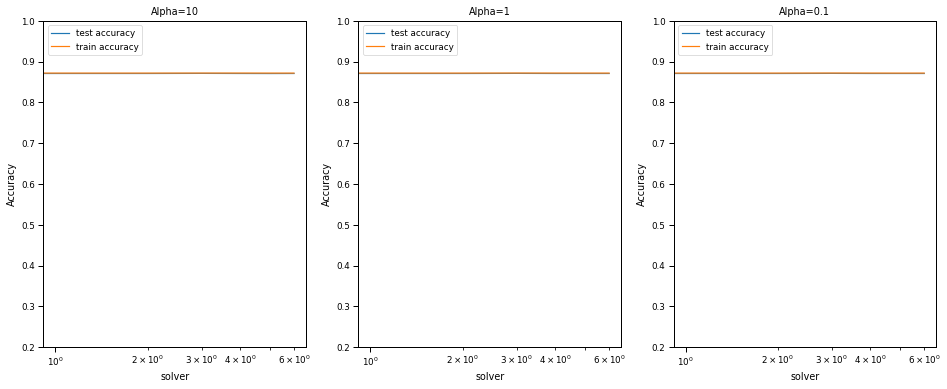

In [150]:
# # plotting
plt.figure(figsize=(16,6))
# subplot 1/4
plt.subplot(131)
alpha_01 = cv_results[cv_results['param_alpha']==10]
plt.plot(alpha_01["param_solver"], alpha_01["mean_test_score"])
plt.plot(alpha_01["param_solver"], alpha_01["mean_train_score"])
plt.xlabel('solver')
plt.ylabel('Accuracy')
plt.title("Alpha=10")
plt.ylim([0.20, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/4
plt.subplot(132)
alpha_001 = cv_results[cv_results['param_alpha']==1]

plt.plot(alpha_001["param_solver"], alpha_001["mean_test_score"])
plt.plot(alpha_001["param_solver"], alpha_001["mean_train_score"])
plt.xlabel('solver')
plt.ylabel('Accuracy')
plt.title("Alpha=1")
plt.ylim([0.20, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/4
plt.subplot(133)
alpha_0001 = cv_results[cv_results['param_alpha']==0.1]

plt.plot(alpha_0001["param_solver"], alpha_0001["mean_test_score"])
plt.plot(alpha_0001["param_solver"], alpha_0001["mean_train_score"])
plt.xlabel('solver')
plt.ylabel('Accuracy')
plt.title("Alpha=0.1")
plt.ylim([0.20, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [151]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8713355432996241 corresponding to hyperparameters {'alpha': 10, 'solver': 'lsqr'}


#### Now let us run RidgeClassifier with hyper parameters of alpha -> 10 and solver-> lsqr

In [152]:
# specify model
rc = RidgeClassifier(alpha=10, solver='lsqr')     

# fit the model
rc.fit(X_train_rc, y_train) 

RidgeClassifier(alpha=10, solver='lsqr')

In [153]:
y_train_rc = rc.predict(X_train_rc)
y_test_rc = rc.predict(X_test_rc)
time_taken = time.time() - start

In [154]:
print('Train confusion matrix : \n',confusion_matrix(y_train,y_train_rc))
print('Test confusion matrix : \n',confusion_matrix(y_test,y_test_rc))

print('Train accuracy : ',round(metrics.accuracy_score(y_train,y_train_rc),2))
print('Test accuracy : ',round(metrics.accuracy_score(y_test,y_test_rc),2))

print('Train recall : ',round(metrics.recall_score(y_train,y_train_rc),2))
print('Test recall :',round(metrics.recall_score(y_test,y_test_rc),2))

Train confusion matrix : 
 [[6237 1642]
 [1003 6876]]
Test confusion matrix : 
 [[14350  3970]
 [  303  1339]]
Train accuracy :  0.83
Test accuracy :  0.79
Train recall :  0.87
Test recall : 0.82


In [155]:
new_row = pd.DataFrame([['Ridge Classifier', 
                        round(metrics.accuracy_score(y_train, y_train_rc),2),
                        round(metrics.accuracy_score(y_test, y_test_rc),2), 
                        round(metrics.recall_score(y_train, y_train_rc),2),
                        round(metrics.recall_score(y_test, y_test_rc),2),
                        round(metrics.f1_score(y_train, y_train_rc),2),
                        round(metrics.f1_score(y_test, y_test_rc),2),
                        round(time_taken, 2)]], columns=all_models.columns)
all_models = all_models.append(new_row)
all_models

,Model name,train accuracy,test accuracy,train recall,test recall,train f1,test f1,time taken in secs
0,Logistic Regression,0.84,0.83,0.84,0.77,0.84,0.43,0.07
0,Decision Trees,0.69,0.92,0.68,0.00,0.69,0.00,0.06
0,RandomForests,0.99,0.89,1.00,0.23,0.99,0.26,507.60
0,StackingClassifier,0.88,0.81,0.87,0.79,0.87,0.41,148.34
0,Bagging Classifier,0.83,0.79,0.87,0.81,0.84,0.39,2801.37
0,XGBoost Classifier,1.00,0.89,1.00,0.13,1.00,0.17,80.01
0,MLP Classifier,0.83,0.86,0.87,0.76,0.84,0.46,49.81
0,AdaBoost Classifier,0.83,0.84,0.88,0.78,0.84,0.44,33.28
0,QuadraticDiscriminantAnalysis,0.75,0.91,0.91,0.40,0.78,0.41,1.84
0,Ridge Classifier,0.83,0.79,0.87,0.82,0.84,0.39,11.70


### Let us use SGDClassifier to model

In [156]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [157]:
X_train_sgd = Xtrain_reduced
X_test_sgd = Xtest_reduced

# creating a KFold object with 3 splits 
folds = KFold(n_splits = 3, shuffle = True, random_state = 100)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'penalty': ['l1','l2','elasticnet'],  
                    'alpha': [0.7, 0.8, 0.9, 2.0, 5.0, 10],
                 'learning_rate': ['adaptive','optimal','constant'],
                 'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron',
                         'squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive']}]

# specify model
model = SGDClassifier(eta0=0.08)

scoring_set = {'Recall': make_scorer(recall_score), 'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= scoring_set,
                        refit='F1',
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1,
                        return_train_score=True)      

# fit the model
start = time.time()
model_cv.fit(X_train_sgd, y_train)   

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1458 out of 1458 | elapsed:  5.1min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             estimator=SGDClassifier(eta0=0.08), n_jobs=-1,
             param_grid=[{'alpha': [0.7, 0.8, 0.9, 2.0, 5.0, 10],
                          'learning_rate': ['adaptive', 'optimal', 'constant'],
                          'loss': ['hinge', 'log', 'modified_huber',
                                   'squared_hinge', 'perceptron',
                                   'squared_loss', 'huber',
                                   'epsilon_insensitive',
                                   'squared_epsilon_insensitive'],
                          'penalty': ['l1', 'l2', 'elasticnet']}],
             refit='F1', return_train_score=True,
             scoring={'Accuracy': make_scorer(accuracy_score),
                      'F1': make_scorer(f1_score),
                      'Recall': make_scorer(recall_score)},
             verbose=1)

In [158]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_learning_rate,param_loss,param_penalty,params,split0_test_Recall,...,split1_test_F1,split2_test_F1,mean_test_F1,std_test_F1,rank_test_F1,split0_train_F1,split1_train_F1,split2_train_F1,mean_train_F1,std_train_F1
0,0.795221,0.064817,0.028403,0.025705,0.7,adaptive,hinge,l1,"{'alpha': 0.7, 'learning_rate': 'adaptive', 'l...",0.903628,...,0.714134,0.714005,0.715998,0.002728,157,0.715793,0.716366,0.715981,0.716046,0.000238
1,0.310368,0.047169,0.016732,0.004309,0.7,adaptive,hinge,l2,"{'alpha': 0.7, 'learning_rate': 'adaptive', 'l...",0.862434,...,0.825895,0.834360,0.832818,0.005141,21,0.833596,0.837513,0.833700,0.834936,0.001822
2,1.092904,0.054185,0.023730,0.005256,0.7,adaptive,hinge,elasticnet,"{'alpha': 0.7, 'learning_rate': 'adaptive', 'l...",0.861678,...,0.811986,0.817647,0.817827,0.004844,51,0.814686,0.820715,0.817919,0.817773,0.002463
3,1.398388,0.222449,0.013643,0.005997,0.7,adaptive,log,l1,"{'alpha': 0.7, 'learning_rate': 'adaptive', 'l...",0.000000,...,0.000000,0.659349,0.219783,0.310820,402,0.000000,0.000000,0.670295,0.223432,0.315980
4,0.927072,0.167839,0.026601,0.008295,0.7,adaptive,log,l2,"{'alpha': 0.7, 'learning_rate': 'adaptive', 'l...",0.853741,...,0.823702,0.826809,0.826501,0.002170,35,0.825450,0.829653,0.826851,0.827318,0.001748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0.042086,0.005996,0.010923,0.000104,10,constant,epsilon_insensitive,l2,"{'alpha': 10, 'learning_rate': 'constant', 'lo...",0.457294,...,0.529184,0.299682,0.435081,0.098139,343,0.471897,0.535610,0.311037,0.439515,0.094497
482,0.100287,0.023354,0.009499,0.000536,10,constant,epsilon_insensitive,elasticnet,"{'alpha': 10, 'learning_rate': 'constant', 'lo...",0.000000,...,0.670631,0.000000,0.223544,0.316139,378,0.000000,0.664675,0.000000,0.221558,0.313331
483,0.105426,0.027038,0.009174,0.000419,10,constant,squared_epsilon_insensitive,l1,"{'alpha': 10, 'learning_rate': 'constant', 'lo...",1.000000,...,0.000000,0.659349,0.443102,0.313351,326,0.665015,0.000000,0.670295,0.445103,0.314743
484,0.054959,0.008809,0.010697,0.000544,10,constant,squared_epsilon_insensitive,l2,"{'alpha': 10, 'learning_rate': 'constant', 'lo...",0.649282,...,0.647676,0.583987,0.624236,0.028588,231,0.626914,0.643807,0.580723,0.617148,0.026664


In [159]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8373323725473126 corresponding to hyperparameters {'alpha': 0.7, 'learning_rate': 'adaptive', 'loss': 'squared_hinge', 'penalty': 'l2'}


#### Now let us model using tuned hyper parameters 

In [160]:
X_train_sgd = Xtrain_reduced
X_test_sgd = Xtest_reduced

sgd = SGDClassifier(eta0=0.08, alpha=0.01, learning_rate='adaptive', loss='hinge', 
                    penalty='l1', fit_intercept=False)

# fit the model
sgd.fit(X_train_sgd, y_train)

sgd_y_train_predict = sgd.predict(X_train_sgd)
sgd_y_test_predict = sgd.predict(X_test_sgd)
time_taken = time.time() - start

In [161]:
print('Train confusion matrix : \n',confusion_matrix(y_train,sgd_y_train_predict))
print('Test confusion matrix : \n',confusion_matrix(y_test,sgd_y_test_predict))

print('Train accuracy : ',round(metrics.accuracy_score(y_train,sgd_y_train_predict),2))
print('Test accuracy : ',round(metrics.accuracy_score(y_test,sgd_y_test_predict),2))

print('Train recall : ',round(metrics.recall_score(y_train,sgd_y_train_predict),2))
print('Test recall :',round(metrics.recall_score(y_test,sgd_y_test_predict),2))

Train confusion matrix : 
 [[6246 1633]
 [ 918 6961]]
Test confusion matrix : 
 [[14515  3805]
 [  312  1330]]
Train accuracy :  0.84
Test accuracy :  0.79
Train recall :  0.88
Test recall : 0.81


In [162]:
new_row = pd.DataFrame([['SGD', 
                         round(metrics.accuracy_score(y_train, sgd_y_train_predict),2),
                         round(metrics.accuracy_score(y_test, sgd_y_test_predict),2), 
                         round(metrics.recall_score(y_train, sgd_y_train_predict),2),
                         round(metrics.recall_score(y_test, sgd_y_test_predict),2),
                         round(metrics.f1_score(y_train, sgd_y_train_predict),2),
                         round(metrics.f1_score(y_test, sgd_y_test_predict),2),
                        round(time_taken, 2)]], columns=all_models.columns)
all_models = all_models.append(new_row)
all_models

,Model name,train accuracy,test accuracy,train recall,test recall,train f1,test f1,time taken in secs
0,Logistic Regression,0.84,0.83,0.84,0.77,0.84,0.43,0.07
0,Decision Trees,0.69,0.92,0.68,0.00,0.69,0.00,0.06
0,RandomForests,0.99,0.89,1.00,0.23,0.99,0.26,507.60
0,StackingClassifier,0.88,0.81,0.87,0.79,0.87,0.41,148.34
0,Bagging Classifier,0.83,0.79,0.87,0.81,0.84,0.39,2801.37
0,XGBoost Classifier,1.00,0.89,1.00,0.13,1.00,0.17,80.01
0,MLP Classifier,0.83,0.86,0.87,0.76,0.84,0.46,49.81
0,AdaBoost Classifier,0.83,0.84,0.88,0.78,0.84,0.44,33.28
0,QuadraticDiscriminantAnalysis,0.75,0.91,0.91,0.40,0.78,0.41,1.84
0,Ridge Classifier,0.83,0.79,0.87,0.82,0.84,0.39,11.70


### Now let us use GradientBoostingClassifier

In [163]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

X_train_gbc = Xtrain_reduced
X_test_gbc = Xtest_reduced

gbc = GradientBoostingClassifier(random_state=100)

# Create the parameter grid based on the results of random search 
param_grid = {"loss": ["deviance", "exponential"],
              "learning_rate"    : [0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00],
              "n_estimators"     : [100, 250, 500, 750, 1000],
              "min_samples_split": [25, 50, 100, 200],
              "min_samples_leaf" : [25, 50, 100, 200],
              "max_depth"        : [16, 20], 
              "max_features"     : [5, 10, 20, 50] }

folds = 3
param_comb = 5

scoring_set = {'Recall': make_scorer(recall_score), 'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 100)

random_search = RandomizedSearchCV(gbc, param_distributions=param_grid, n_iter=param_comb, 
                                   scoring=scoring_set, refit='Recall', n_jobs=4, cv=skf.split(X_train_gbc,y_train), 
                                   verbose=3, random_state=100)

In [164]:
# fit
start = time.time()
random_search.fit(X_train_gbc,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  5.7min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fe5b65a47d0>,
                   estimator=GradientBoostingClassifier(random_state=100),
                   n_iter=5, n_jobs=4,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1.0],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [16, 20],
                                        'max_features': [5, 10, 20, 50],
                                        'min_samples_leaf': [25, 50, 100, 200],
                                        'min_samples_split': [25, 50, 100, 200],
                                        'n_estimators': [100, 250, 500, 750,
                                                         1000]},
                   random_state=100, refit='Recall',
               

In [165]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 All results:
{'mean_fit_time': array([5.26978843e+01, 1.26315185e+02, 1.23991180e+02, 1.18119717e-02,
       1.06402523e+02]), 'std_fit_time': array([4.73178724e-01, 2.74005017e+00, 3.59357357e+00, 6.57497407e-04,
       1.60652280e+01]), 'mean_score_time': array([0.06649741, 0.19615515, 0.76845868, 0.        , 0.47957436]), 'std_score_time': array([0.00068402, 0.06900334, 0.16605897, 0.        , 0.14730234]), 'param_n_estimators': masked_array(data=[100, 250, 1000, 1000, 1000],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_split': masked_array(data=[25, 200, 200, 200, 200],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[100, 100, 50, 50, 200],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=[20, 20, 5, 50, 5],

#### Now let us run GradientBoostingClassifier with hyper parameters 

In [166]:
X_train_gbcfinal = Xtrain_reduced
X_test_gbcfinal = Xtest_reduced

gbc_final = GradientBoostingClassifier(n_estimators=1000, min_samples_split=200, min_samples_leaf=200,
                                       max_features=5, max_depth=16,
                                       loss='deviance', learning_rate=0.1, random_state=100)

gbc_final.fit(X_train_gbcfinal, y_train)
y_train_gbcfinal = gbc_final.predict(X_train_gbcfinal) 
y_test_gbcfinal = gbc_final.predict(X_test_gbcfinal) 
ada_final.score(X_test_gbcfinal,y_test_gbcfinal)
time_taken = time.time() - start

In [167]:
print('Train confusion matrix : \n',confusion_matrix(y_train,y_train_gbcfinal))
print('Test confusion matrix : \n',confusion_matrix(y_test,y_test_gbcfinal))

print('Train accuracy : ',round(metrics.accuracy_score(y_train,y_train_gbcfinal),2))
print('Test accuracy : ',round(metrics.accuracy_score(y_test,y_test_gbcfinal),2))

print('Train recall : ',round(metrics.recall_score(y_train,y_train_gbcfinal),2))
print('Test recall :',round(metrics.recall_score(y_test,y_test_gbcfinal),2))

Train confusion matrix : 
 [[7879    0]
 [   0 7879]]
Test confusion matrix : 
 [[18148   172]
 [ 1561    81]]
Train accuracy :  1.0
Test accuracy :  0.91
Train recall :  1.0
Test recall : 0.05


In [168]:
new_row = pd.DataFrame([['GradientBoostingClassifier', 
                         round(metrics.accuracy_score(y_train, y_train_gbcfinal),2),
                         round(metrics.accuracy_score(y_test, y_test_gbcfinal),2), 
                         round(metrics.recall_score(y_train, y_train_gbcfinal),2),
                         round(metrics.recall_score(y_test, y_test_gbcfinal),2),
                         round(metrics.f1_score(y_train, y_train_gbcfinal),2),
                         round(metrics.f1_score(y_test, y_test_gbcfinal),2),
                        round(time_taken, 2)]], columns=all_models.columns)
all_models = all_models.append(new_row)
all_models

,Model name,train accuracy,test accuracy,train recall,test recall,train f1,test f1,time taken in secs
0,Logistic Regression,0.84,0.83,0.84,0.77,0.84,0.43,0.07
0,Decision Trees,0.69,0.92,0.68,0.00,0.69,0.00,0.06
0,RandomForests,0.99,0.89,1.00,0.23,0.99,0.26,507.60
0,StackingClassifier,0.88,0.81,0.87,0.79,0.87,0.41,148.34
0,Bagging Classifier,0.83,0.79,0.87,0.81,0.84,0.39,2801.37
0,XGBoost Classifier,1.00,0.89,1.00,0.13,1.00,0.17,80.01
0,MLP Classifier,0.83,0.86,0.87,0.76,0.84,0.46,49.81
0,AdaBoost Classifier,0.83,0.84,0.88,0.78,0.84,0.44,33.28
0,QuadraticDiscriminantAnalysis,0.75,0.91,0.91,0.40,0.78,0.41,1.84
0,Ridge Classifier,0.83,0.79,0.87,0.82,0.84,0.39,11.70


### Linear Discriminant Analysis

In [169]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train_lda = Xtrain_reduced
X_test_lda = Xtest_reduced

lda = LinearDiscriminantAnalysis(shrinkage='auto')

# Create the parameter grid based on the results of random search 
param_grid = {"solver": ['svd', 'lsqr', 'eigen'],
              "shrinkage":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
             }

folds = 3
param_comb = 5

scoring_set = {'Recall': make_scorer(recall_score), 'Accuracy': make_scorer(accuracy_score),
              'F1': make_scorer(f1_score)}
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 100)

random_search = RandomizedSearchCV(lda, param_distributions=param_grid, n_iter=param_comb, 
                                   scoring=scoring_set, refit='Recall', n_jobs=4, cv=skf.split(X_train_gbc,y_train), 
                                   verbose=3, random_state=100)


In [170]:
# fit
start = time.time()
random_search.fit(X_train_lda,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    3.1s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fe5ae6265d0>,
                   estimator=LinearDiscriminantAnalysis(shrinkage='auto'),
                   n_iter=5, n_jobs=4,
                   param_distributions={'shrinkage': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9, 1.0],
                                        'solver': ['svd', 'lsqr', 'eigen']},
                   random_state=100, refit='Recall',
                   scoring={'Accuracy': make_scorer(accuracy_score),
                            'F1': make_scorer(f1_score),
                            'Recall': make_scorer(recall_score)},
                   verbose=3)

In [171]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)


 All results:
{'mean_fit_time': array([0.00764839, 0.1050423 , 0.08773232, 0.13928493, 0.11621531]), 'std_fit_time': array([0.00044669, 0.02874089, 0.00431618, 0.03645779, 0.03556799]), 'mean_score_time': array([0.        , 0.00960461, 0.00851846, 0.01841251, 0.01048207]), 'std_score_time': array([0.        , 0.00102107, 0.00141259, 0.01203356, 0.00156609]), 'param_solver': masked_array(data=['svd', 'eigen', 'lsqr', 'lsqr', 'eigen'],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_shrinkage': masked_array(data=[0.4, 0.9, 1.0, 0.5, 0.2],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'solver': 'svd', 'shrinkage': 0.4}, {'solver': 'eigen', 'shrinkage': 0.9}, {'solver': 'lsqr', 'shrinkage': 1.0}, {'solver': 'lsqr', 'shrinkage': 0.5}, {'solver': 'eigen', 'shrinkage': 0.2}], 'split0_test_Recall': array([       nan, 0.86405179, 0.85643564, 0.87166794, 0.87738

### Now let us run the LinearDiscriminantAnalysys with hyperparameters

In [172]:
X_train_ldafinal = Xtrain_reduced
X_test_ldafinal = Xtest_reduced


lda_final = LinearDiscriminantAnalysis(shrinkage=0.07, solver='eigen')

lda_final.fit(X_train_ldafinal, y_train)
y_train_ldafinal = lda_final.predict(X_train_ldafinal) 
y_test_ldafinal = lda_final.predict(X_test_ldafinal) 
lda_final.score(X_test_ldafinal,y_test_ldafinal)
time_taken = time.time() - start

In [173]:
print('Train confusion matrix : \n',confusion_matrix(y_train,y_train_ldafinal))
print('Test confusion matrix : \n',confusion_matrix(y_test,y_test_ldafinal))

print('Train accuracy : ',round(metrics.accuracy_score(y_train,y_train_ldafinal),2))
print('Test accuracy : ',round(metrics.accuracy_score(y_test,y_test_ldafinal),2))

print('Train recall : ',round(metrics.recall_score(y_train,y_train_ldafinal),2))
print('Test recall :',round(metrics.recall_score(y_test,y_test_ldafinal),2))


Train confusion matrix : 
 [[6226 1653]
 [1007 6872]]
Test confusion matrix : 
 [[14829  3491]
 [  328  1314]]
Train accuracy :  0.83
Test accuracy :  0.81
Train recall :  0.87
Test recall : 0.8


In [174]:
new_row = pd.DataFrame([['LinearDiscriminantClassifier', 
                         round(metrics.accuracy_score(y_train, y_train_ldafinal),2),
                         round(metrics.accuracy_score(y_test, y_test_ldafinal),2), 
                         round(metrics.recall_score(y_train, y_train_ldafinal),2),
                         round(metrics.recall_score(y_test, y_test_ldafinal),2),
                         round(metrics.f1_score(y_train, y_train_ldafinal),2),
                         round(metrics.f1_score(y_test, y_test_ldafinal),2),
                        round(time_taken, 2)]], columns=all_models.columns)
all_models = all_models.append(new_row)
all_models

,Model name,train accuracy,test accuracy,train recall,test recall,train f1,test f1,time taken in secs
0,Logistic Regression,0.84,0.83,0.84,0.77,0.84,0.43,0.07
0,Decision Trees,0.69,0.92,0.68,0.00,0.69,0.00,0.06
0,RandomForests,0.99,0.89,1.00,0.23,0.99,0.26,507.60
0,StackingClassifier,0.88,0.81,0.87,0.79,0.87,0.41,148.34
0,Bagging Classifier,0.83,0.79,0.87,0.81,0.84,0.39,2801.37
0,XGBoost Classifier,1.00,0.89,1.00,0.13,1.00,0.17,80.01
0,MLP Classifier,0.83,0.86,0.87,0.76,0.84,0.46,49.81
0,AdaBoost Classifier,0.83,0.84,0.88,0.78,0.84,0.44,33.28
0,QuadraticDiscriminantAnalysis,0.75,0.91,0.91,0.40,0.78,0.41,1.84
0,Ridge Classifier,0.83,0.79,0.87,0.82,0.84,0.39,11.70


### LightGBM

In [190]:
import lightgbm as lgb

X_train_lightgbm = Xtrain_reduced
X_test_lightgbm = Xtest_reduced
train_data = lgb.Dataset(X_train_lightgbm, label=y_train)
test_data = lgb.Dataset(X_test_lightgbm, label=y_test)

In [191]:
num_round = 10
param = {'num_leaves': 31, 'objective': 'binary'}
param['metric'] = ['auc', 'binary_logloss']
start = time.time()
lightgbm_model = lgb.train(param, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=5)

[LightGBM] [Info] Number of positive: 7879, number of negative: 7879
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 15758, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[1]	valid_0's auc: 0.632627	valid_0's binary_logloss: 0.651779
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.633925	valid_0's binary_logloss: 0.633202
[3]	valid_0's auc: 0.647517	valid_0's binary_logloss: 0.610841
[4]	valid_0's auc: 0.649681	valid_0's binary_logloss: 0.60023
[5]	valid_0's auc: 0.645963	valid_0's binary_logloss: 0.608346
[6]	valid_0's auc: 0.651208	valid_0's binary_logloss: 0.587775
[7]	valid_0's auc: 0.643356	valid_0's binary_logloss: 0.582731
[8]	valid_0's auc: 0.644551	valid_0's binary_logloss: 0.6018

In [192]:
y_lgb_train_pred = lightgbm_model.predict(X_train_lightgbm)
y_lgb_test_pred = lightgbm_model.predict(X_test_lightgbm)
time_taken = time.time() - start

In [193]:
y_lgb_train_pred = list(map(lambda x: 1 if x >= 0.5 else 0, y_lgb_train_pred))
y_lgb_test_pred = list(map(lambda x: 1 if x >= 0.5 else 0, y_lgb_test_pred))

In [194]:
print('Train confusion matrix : \n',confusion_matrix(y_train,y_lgb_train_pred))
print('Test confusion matrix : \n',confusion_matrix(y_test,y_lgb_test_pred))

print('Train accuracy : ',round(metrics.accuracy_score(y_train,y_lgb_train_pred),2))
print('Test accuracy : ',round(metrics.accuracy_score(y_test,y_lgb_test_pred),2))

print('Train recall : ',round(metrics.recall_score(y_train,y_lgb_train_pred),2))
print('Test recall :',round(metrics.recall_score(y_test,y_lgb_test_pred),2))

Train confusion matrix : 
 [[6734 1145]
 [1156 6723]]
Test confusion matrix : 
 [[14395  3925]
 [  891   751]]
Train accuracy :  0.85
Test accuracy :  0.76
Train recall :  0.85
Test recall : 0.46


In [196]:
new_row = pd.DataFrame([['Light GBM', 
                         round(metrics.accuracy_score(y_train,y_lgb_train_pred),2),
                         round(metrics.accuracy_score(y_test,y_lgb_test_pred),2), 
                         round(metrics.recall_score(y_train,y_lgb_train_pred),2),
                         round(metrics.recall_score(y_test,y_lgb_test_pred),2),
                         round(metrics.f1_score(y_train,y_lgb_train_pred),2),
                         round(metrics.f1_score(y_test,y_lgb_test_pred),2),
                        round(time_taken, 2)]], columns=all_models.columns)
all_models = all_models.append(new_row)
all_models

,Model name,train accuracy,test accuracy,train recall,test recall,train f1,test f1,time taken in secs
0,Logistic Regression,0.84,0.83,0.84,0.77,0.84,0.43,0.07
0,Decision Trees,0.69,0.92,0.68,0.00,0.69,0.00,0.06
0,RandomForests,0.99,0.89,1.00,0.23,0.99,0.26,507.60
0,StackingClassifier,0.88,0.81,0.87,0.79,0.87,0.41,148.34
0,Bagging Classifier,0.83,0.79,0.87,0.81,0.84,0.39,2801.37
0,XGBoost Classifier,1.00,0.89,1.00,0.13,1.00,0.17,80.01
0,MLP Classifier,0.83,0.86,0.87,0.76,0.84,0.46,49.81
0,AdaBoost Classifier,0.83,0.84,0.88,0.78,0.84,0.44,33.28
0,QuadraticDiscriminantAnalysis,0.75,0.91,0.91,0.40,0.78,0.41,1.84
0,Ridge Classifier,0.83,0.79,0.87,0.82,0.84,0.39,11.70


### Neural Networks

In [372]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

X_train, y_train = X_res, y_res

X_train_nn_mlp = X_train
X_test_nn_mlp = X_test

In [373]:
X_train_nn_mlp = np.asarray(X_train_nn_mlp, dtype=np.float32)
X_test_nn_mlp = np.asarray(X_test_nn_mlp, dtype=np.float32)

In [415]:
model = tf.keras.Sequential([
                    tf.keras.layers.BatchNormalization(input_shape=(X_train_nn_mlp.shape[1],)),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(16, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(16, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_23 (Batc (None, 174)               696       
_________________________________________________________________
flatten_9 (Flatten)          (None, 174)               0         
_________________________________________________________________
dense_149 (Dense)            (None, 16)                2800      
_________________________________________________________________
dropout_49 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_150 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_50 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_151 (Dense)            (None, 1)               

In [416]:
start = time.time()
es = tf.keras.callbacks.EarlyStopping(monitor='accuracy', mode='max', patience=5)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [417]:
history=model.fit(X_train_nn_mlp, y_train, validation_data=(X_test_nn_mlp, y_test), 
                  epochs=20, callbacks=[es], batch_size=32, verbose =1)
time_taken = time.time() - start

Epoch 1/20
1310/1310 [==============================] - 3s 2ms/step - loss: 0.4982 - accuracy: 0.7680 - val_loss: 0.3814 - val_accuracy: 0.8596
Epoch 2/20
1310/1310 [==============================] - 3s 2ms/step - loss: 0.3721 - accuracy: 0.8582 - val_loss: 0.3127 - val_accuracy: 0.8810
Epoch 3/20
1310/1310 [==============================] - 3s 2ms/step - loss: 0.3454 - accuracy: 0.8698 - val_loss: 0.3510 - val_accuracy: 0.8746
Epoch 4/20
1310/1310 [==============================] - 3s 2ms/step - loss: 0.3303 - accuracy: 0.8762 - val_loss: 0.3081 - val_accuracy: 0.8906
Epoch 5/20
1310/1310 [==============================] - 3s 2ms/step - loss: 0.3143 - accuracy: 0.8824 - val_loss: 0.3703 - val_accuracy: 0.8582
Epoch 6/20
1310/1310 [==============================] - 3s 2ms/step - loss: 0.3043 - accuracy: 0.8872 - val_loss: 0.2946 - val_accuracy: 0.8811
Epoch 7/20
1310/1310 [==============================] - 3s 2ms/step - loss: 0.2980 - accuracy: 0.8889 - val_loss: 0.2783 - val_accuracy:

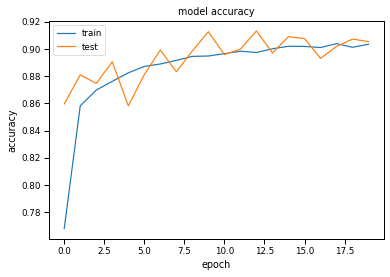

In [418]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

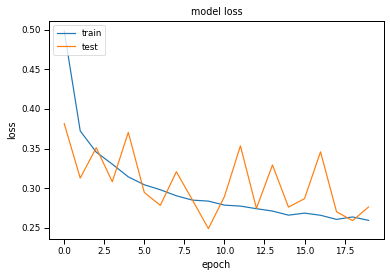

In [419]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [420]:
y_nn_mlp_train_pred = model.predict(X_train_nn_mlp)
y_nn_mlp_test_pred = model.predict(X_test_nn_mlp)

y_nn_mlp_train_pred = list(map(lambda x: 1 if x >= 0.5 else 0, y_nn_mlp_train_pred))
y_nn_mlp_test_pred = list(map(lambda x: 1 if x >= 0.5 else 0, y_nn_mlp_test_pred))

In [421]:
print('Train confusion matrix : \n',confusion_matrix(y_train,y_nn_mlp_train_pred))
print('Test confusion matrix : \n',confusion_matrix(y_test,y_nn_mlp_test_pred))

print('Train accuracy : ',round(metrics.accuracy_score(y_train,y_nn_mlp_train_pred),2))
print('Test accuracy : ',round(metrics.accuracy_score(y_test,y_nn_mlp_test_pred),2))

print('Train recall : ',round(metrics.recall_score(y_train,y_nn_mlp_train_pred),2))
print('Test recall :',round(metrics.recall_score(y_test,y_nn_mlp_test_pred),2))

Train confusion matrix : 
 [[19292  1663]
 [ 1149 19806]]
Test confusion matrix : 
 [[4845  399]
 [ 141  319]]
Train accuracy :  0.93
Test accuracy :  0.91
Train recall :  0.95
Test recall : 0.69


In [422]:
new_row = pd.DataFrame([['Neural Networks', 
                         round(metrics.accuracy_score(y_train,y_nn_mlp_train_pred),2),
                         round(metrics.accuracy_score(y_test,y_nn_mlp_test_pred),2), 
                         round(metrics.recall_score(y_train,y_nn_mlp_train_pred),2),
                         round(metrics.recall_score(y_test,y_nn_mlp_test_pred),2),
                         round(metrics.f1_score(y_train,y_nn_mlp_train_pred),2),
                         round(metrics.f1_score(y_test,y_nn_mlp_test_pred),2),
                        round(time_taken, 2)]], columns=all_models.columns)
all_models = all_models.append(new_row)
all_models

,Model name,train accuracy,test accuracy,train recall,test recall,train f1,test f1,time taken in secs
0,Logistic Regression,0.84,0.83,0.84,0.77,0.84,0.43,0.07
0,Decision Trees,0.69,0.92,0.68,0.00,0.69,0.00,0.06
0,RandomForests,0.99,0.89,1.00,0.23,0.99,0.26,507.60
0,StackingClassifier,0.88,0.81,0.87,0.79,0.87,0.41,148.34
0,Bagging Classifier,0.83,0.79,0.87,0.81,0.84,0.39,2801.37
0,XGBoost Classifier,1.00,0.89,1.00,0.13,1.00,0.17,80.01
0,MLP Classifier,0.83,0.86,0.87,0.76,0.84,0.46,49.81
0,AdaBoost Classifier,0.83,0.84,0.88,0.78,0.84,0.44,33.28
0,QuadraticDiscriminantAnalysis,0.75,0.91,0.91,0.40,0.78,0.41,1.84
0,Ridge Classifier,0.83,0.79,0.87,0.82,0.84,0.39,11.70


#### Let us look at the models with all metrics(train and test accuracies, train and test recall rates) more than 75%

In [427]:
print(all_models.columns)
models_75 = all_models[(all_models['test recall'] >= 0.75) & (all_models['test accuracy'] >= 0.75) &
                      (all_models['train recall'] >= 0.75) & (all_models['train accuracy'] >= 0.75)]
models_75.sort_values(by='test recall', ascending=False)

Index(['Model name', 'train accuracy', 'test accuracy', 'train recall',
       'test recall', 'train f1', 'test f1', 'time taken in secs'],
      dtype='object')


,Model name,train accuracy,test accuracy,train recall,test recall,train f1,test f1,time taken in secs
0,Ridge Classifier,0.83,0.79,0.87,0.82,0.84,0.39,11.70
0,Bagging Classifier,0.83,0.79,0.87,0.81,0.84,0.39,2801.37
0,SGD,0.84,0.79,0.88,0.81,0.85,0.39,306.68
0,LinearDiscriminantClassifier,0.83,0.81,0.87,0.80,0.84,0.41,3.45
0,StackingClassifier,0.88,0.81,0.87,0.79,0.87,0.41,148.34
0,AdaBoost Classifier,0.83,0.84,0.88,0.78,0.84,0.44,33.28
0,Logistic Regression,0.84,0.83,0.84,0.77,0.84,0.43,0.07
0,MLP Classifier,0.83,0.86,0.87,0.76,0.84,0.46,49.81


**Some information on metrics used**
1. accuracy

  accuracy represents the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true. In other words, percentage of correctly predicted values.

2. recall

  The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
  The recall is intuitively the ability of the classifier to find all the positive samples.  In our case, we do not want to miss out churn customers and hence recall is one of the important metric we should look at. The best value is 1 and the worst value is 0.

3. f1_score

  Used for binary targets (or classification algorithms with two possible outputs).  f1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The formula for the F1 score is:

  F1 = 2 * (precision * recall) / (precision + recall)

### Based on the above table, we can see
#### 1. We see accuracies and recall rates higher than 75% for both SGD Classifier, Ridge Classifier, Bagging Classifier, LinearDiscriminantClassifier, Logistic Regression,  Stacking Classifier, MLP Classifier and AdaBoostClassifier models.
#### 2. Recall rate of test data set is at 82% with Ridge Classifier and tops the table.
### Based on the above two points, As our interest is to have better recall rates on unseen data, best model for us is Ridge Classifier.
### Ridge Classifier train and test data set accuracies are 83% and 79% where as recall rates are 87% for train data set and 82% for test data set respectively.

### Now let us find the important churn indicators

#### As we have imbalanced classes, let us balance the data set.

In [428]:
from imblearn.over_sampling import SMOTE
from collections import Counter

## Let us remove mobile_number from original set as we do not want mobile number affecting out model.
telecom_y = y
telecom_X = X.drop(['mobile_number'], axis=1)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(telecom_X, telecom_y)

print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 26199, 0: 26199})


In [429]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [18, 20, 22],
    'min_samples_leaf': range(10, 30, 10),
    'min_samples_split': range(10, 30, 10),
    'n_estimators': [100], 
    'max_features': [16, 18, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,  
                          cv = 5, n_jobs = -1,verbose = 1)

In [430]:
# Fit the grid search to the data
grid_search.fit(X_res, y_res)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 60.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [18, 20, 22],
                         'max_features': [16, 18, 20],
                         'min_samples_leaf': range(10, 30, 10),
                         'min_samples_split': range(10, 30, 10),
                         'n_estimators': [100]},
             verbose=1)

In [431]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9473455999603715 using {'max_depth': 22, 'max_features': 20, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}


#### Let us model with best parameters obtained using GridSearchCV.

In [432]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=10, 
                             min_samples_split=10,
                             max_features=20,
                             n_estimators=100)

# fit
rfc.fit(telecom_X, telecom_y)

# predict
y_pred_rfc_imp = rfc.predict(telecom_X)

In [433]:
imp_features = pd.DataFrame(rfc.feature_importances_)

In [434]:
imp_features.head()

,0
0,0.000000
1,0.000000
2,0.000000
3,0.004918
4,0.005701


In [435]:
imp_features['features'] = telecom_X.columns

In [436]:
imp_features.columns = ['rank', 'features']

In [437]:
top20_features = imp_features.sort_values(by=['rank'], ascending=False).head(20)
top20_features

,rank,features
89,0.095264,total_ic_mou_8
71,0.087168,loc_ic_mou_8
65,0.061183,loc_ic_t2m_mou_8
5,0.051950,arpu_8
172,0.048403,total_amount_8
62,0.033383,loc_ic_t2t_mou_8
59,0.033080,total_og_mou_8
107,0.024593,max_rech_amt_8
32,0.022198,loc_og_mou_8
104,0.021543,total_rech_amt_8


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'total_ic_mou_8'),
  Text(0, 1, 'loc_ic_mou_8'),
  Text(0, 2, 'loc_ic_t2m_mou_8'),
  Text(0, 3, 'arpu_8'),
  Text(0, 4, 'total_amount_8'),
  Text(0, 5, 'loc_ic_t2t_mou_8'),
  Text(0, 6, 'total_og_mou_8'),
  Text(0, 7, 'max_rech_amt_8'),
  Text(0, 8, 'loc_og_mou_8'),
  Text(0, 9, 'total_rech_amt_8'),
  Text(0, 10, 'loc_og_t2m_mou_8'),
  Text(0, 11, 'roam_og_mou_8'),
  Text(0, 12, 'last_day_rch_amt_8'),
  Text(0, 13, 'roam_ic_mou_8'),
  Text(0, 14, 'total_data_vol_mb_8'),
  Text(0, 15, 'offnet_mou_8'),
  Text(0, 16, 'total_rech_data_amt_8'),
  Text(0, 17, 'loc_og_t2t_mou_8'),
  Text(0, 18, 'total_rech_data_8'),
  Text(0, 19, 'fb_user_8')])

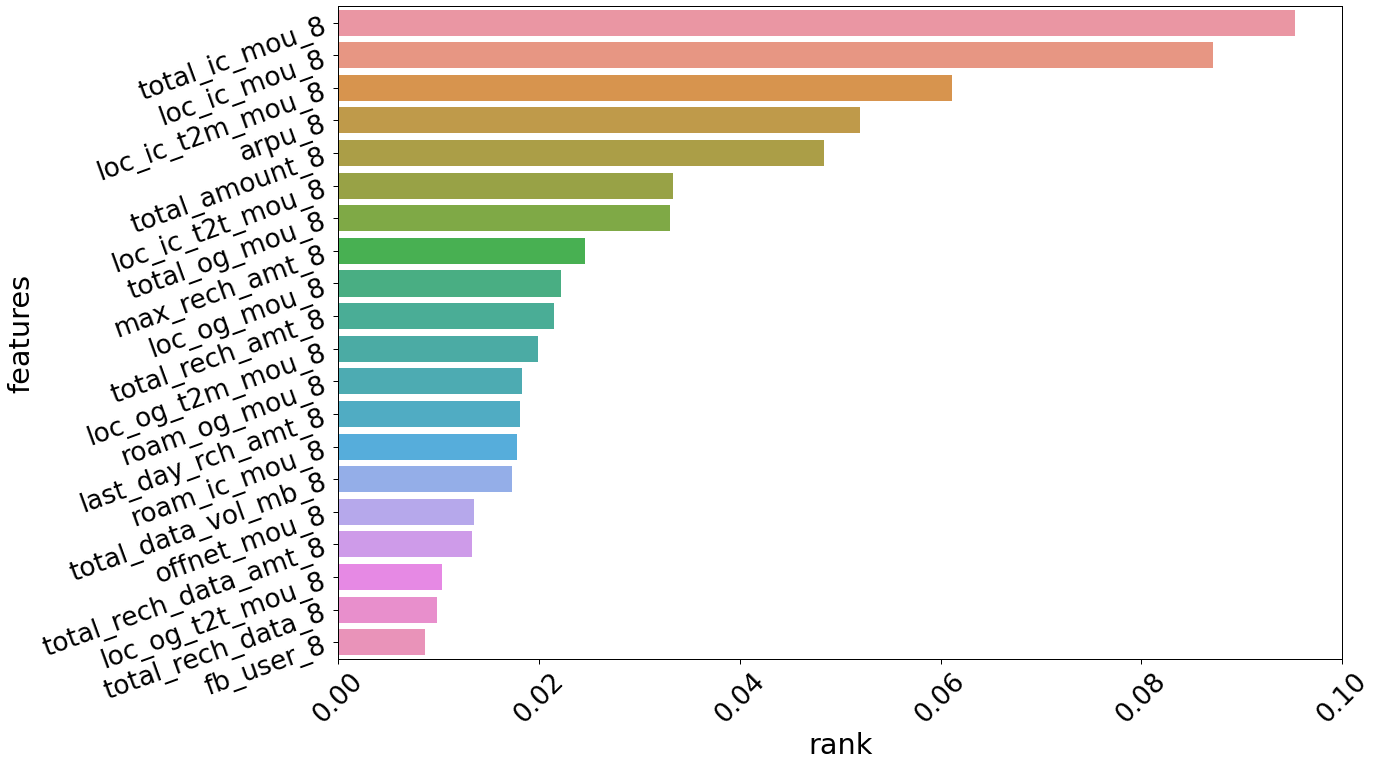

In [438]:
plt.figure(figsize=(18,12))
sns.set_context("paper", font_scale=3)   
sns.barplot(y=top20_features['features'], x=top20_features['rank'])
plt.xticks(rotation=45)
plt.yticks(rotation=20)
#ax.set_ylim(18, 0.1)

#### From the above chart we can see that top ten features affecting the churn are August months figures, i.e. the 3rd month figures in our data set.
#### List of top 20 features that are churn indicators, are given below:
1. total_ic_mou_8      (Total incoming calls minutes of usage - August month)
2. loc_ic_t2m_mou_8    (Local incoming calls from other operator mobiles minutes of usage - August month)
3. total_og_mou_8      (Total outgoing calls minutes of usage - August month)
4. loc_ic_mou_8        (Local incoming calls minutes of usage - August month)
5. arpu_8              (Average Revenue Per User - August month)
6. total_amount_8      (Total amount recharged for both calls and data - August month)
7. total_rech_amt_8    (Total recharged amount - August month)
8. max_rech_amt_8      (Maximum recharged amount - August month)
9. loc_ic_t2t_mou_8    (Local incoming calls within same operator mobile to mobile minutes of usage - August month)
10. loc_og_mou_8       (Local outgoing calls minutes of usage - August month)
11. last_day_rch_amt_8 (Last recharged amount - August month)
12. roam_og_mou_8      (Roaming outgoing calls minutes of usage - August month)
13. roam_ic_mou_8      (Roaming incoming calls minutes of usage - August month)
14. loc_og_t2m_mou_8   (Local outgoing calls to other operator mobiles minutes of usage - August month)
15. fb_user_8          (Facebook used or not - August month)
16. total_data_vol_mb  (Total data volume used 2g + 3g - August month)
17. total_rech_data_8  (Total number of recharges for data - August month)
18. offnet_mou_8       (Allkinds of calls outside the operator network Minutes of usage - August month)
19. std_ic_mou_8       (STD incoming calls minutes of usage - August month)
20. total_rech_data_amt_8 (Total amount recharged for data - August month)

### Business Recommendations to counter the churn rate

#### When we find the majortity of the below parameters or sub parameters are reducing than customers average, then there is an indication customer might churn.  Mobile operator should get in touch with customer and engage customer with offers or additional benefits to keep customer with operator,  and hence reducing the churn rate.


### Recommendations
1. Introduce different types of bundles / packages for different types of users.
2. Exclusive packages for data savvy users. 
3. Exclusive packages for customers who use network only for calls. 
4. Introduce rollover of minutes and data for a month or two.
5. Different packages for STD and ISD users.
6. Facility to pick mix and match from the services and create their own custom bundles.
7. For long term and high value customers, focus on customer engagement.